# CA1
### Jessica Fornetti
The datasets used give information on various pollution indicators per city and information on the population per country. We are acting as a governmental agency interesseted in finding the main factors influencing the levels of pollution and proposing new policies to help decrease the overall pollution.


## Part 1
### Loading and cleaning each dataset

The first dataset World Population by Country (https://www.kaggle.com/datasets/rajkumarpandey02/2023-world-population-by-country), has information about the world population for each country. <br>
We have the following columns : the rank, the poulation from 1980 to 2050(estimated population), the country, the area, the land area per km, the country code, the net change, the growth rate, the world percentage, and the density per km. <br>
There is also the column place and densityMi which we will drop as their meaning is unclear

First we load the dataset. We have a json file so we use the read_json method instead of read_csv.

In [149]:
import pandas as pd
pd.set_option('display.max_columns', None) #to show all the columns

df1 = pd.read_json("countries-table.json")
df1 = df1.rename({"country": "Country"}, axis=1) #we rename the country column to help with merging
df1

,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,500,11452.0,5.138000e+03,4.938000e+03,4.390000e+03,4.386000e+03,4.301000e+03,3.781000e+03,Montserrat,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,230
230,238,2240.0,3.080000e+03,3.187000e+03,3.780000e+03,3.791000e+03,3.869000e+03,3.779000e+03,Falkland Islands,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,231
231,570,3637.0,2.074000e+03,1.812000e+03,1.934000e+03,1.935000e+03,1.948000e+03,2.096000e+03,Niue,261.00,261.00,NU,NIU,0.0000,0.0005,NaN,7.4138,19.2017,232
232,772,1647.0,1.666000e+03,1.367000e+03,1.871000e+03,1.893000e+03,2.046000e+03,2.430000e+03,Tokelau,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,233


In [150]:
df1 = df1.drop(["place", "densityMi"], axis=1)
df1

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
0,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1
1,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,2
2,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,3
3,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,4
4,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,11452.0,5.138000e+03,4.938000e+03,4.390000e+03,4.386000e+03,4.301000e+03,3.781000e+03,Montserrat,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,230
230,2240.0,3.080000e+03,3.187000e+03,3.780000e+03,3.791000e+03,3.869000e+03,3.779000e+03,Falkland Islands,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,231
231,3637.0,2.074000e+03,1.812000e+03,1.934000e+03,1.935000e+03,1.948000e+03,2.096000e+03,Niue,261.00,261.00,NU,NIU,0.0000,0.0005,NaN,7.4138,232
232,1647.0,1.666000e+03,1.367000e+03,1.871000e+03,1.893000e+03,2.046000e+03,2.430000e+03,Tokelau,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,233


We check that the column types are correct. We can also see which columns contain Nas. 

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pop1980          234 non-null    float64
 1   pop2000          234 non-null    float64
 2   pop2010          234 non-null    float64
 3   pop2022          234 non-null    float64
 4   pop2023          234 non-null    float64
 5   pop2030          234 non-null    float64
 6   pop2050          234 non-null    float64
 7   Country          234 non-null    object 
 8   area             234 non-null    float64
 9   landAreaKm       234 non-null    float64
 10  cca2             234 non-null    object 
 11  cca3             234 non-null    object 
 12  netChange        226 non-null    float64
 13  growthRate       234 non-null    float64
 14  worldPercentage  228 non-null    float64
 15  density          234 non-null    float64
 16  rank             234 non-null    int64  
dtypes: float64(13), 

Then we can get summary statistics for each column

In [152]:
df1.describe()

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,area,landAreaKm,netChange,growthRate,worldPercentage,density,rank
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,226.000000,234.000000,228.000000,234.000000,234.000000
mean,1.898462e+07,2.626947e+07,2.984524e+07,3.407441e+07,3.437442e+07,3.651461e+07,4.148628e+07,5.814500e+05,5.571123e+05,0.010306,0.009737,0.004407,451.288182,117.500000
std,8.178519e+07,1.116982e+08,1.242185e+08,1.367664e+08,1.373864e+08,1.417827e+08,1.481676e+08,1.761841e+06,1.689972e+06,0.034774,0.012350,0.017375,1979.362419,67.694165
min,7.330000e+02,6.510000e+02,5.960000e+02,5.100000e+02,5.180000e+02,5.610000e+02,7.310000e+02,4.400000e-01,4.400000e-01,-0.028600,-0.074500,0.000000,0.138000,1.000000
25%,2.296142e+05,3.272420e+05,3.931490e+05,4.197385e+05,4.225982e+05,4.561490e+05,5.466058e+05,2.650000e+03,2.625875e+03,0.000000,0.002325,0.000100,39.747650,59.250000
50%,3.141146e+06,4.292907e+06,4.942770e+06,5.559944e+06,5.643895e+06,6.178231e+06,6.352397e+06,8.119950e+04,7.568925e+04,0.000900,0.008200,0.000750,97.481000,117.500000
75%,9.826054e+06,1.576230e+07,1.915957e+07,2.247650e+07,2.324537e+07,2.616311e+07,3.568614e+07,4.304258e+05,4.047876e+05,0.008000,0.016850,0.002925,242.928650,175.750000
max,9.823725e+08,1.264099e+09,1.348191e+09,1.425887e+09,1.428628e+09,1.514994e+09,1.670491e+09,1.709824e+07,1.637687e+07,0.418400,0.049800,0.178500,21402.705200,234.000000


We can get the dimensions of the data frame. We have 17 columns and 234 rows

In [153]:
df1.shape

(234, 17)

Then we can count the number of Nas for each column

In [154]:
df1.isna().sum()

pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
Country            0
area               0
landAreaKm         0
cca2               0
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
rank               0
dtype: int64

Lets take a look at the rows containing Nas in the netChange and worldPercentage columns

In [155]:
df1.loc[df1['netChange'].isna()]

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
217,21346.0,26823.0,31608.0,33660.0,33642.0,33458.0,32044.0,San Marino,61.00,60.00,SM,SMR,NaN,-0.0005,0.0,560.7000,218
221,12252.0,19726.0,18540.0,18055.0,18058.0,17919.0,16689.0,Palau,459.00,460.00,PW,PLW,NaN,0.0002,0.0,39.2565,222
227,2983.0,7082.0,8988.0,10967.0,10994.0,11113.0,10210.0,Saint Barthelemy,21.00,25.00,BL,BLM,NaN,0.0025,0.0,439.7600,228
228,6106.0,6274.0,6052.0,5862.0,5840.0,5651.0,5165.0,Saint Pierre and Miquelon,242.00,242.00,PM,SPM,NaN,-0.0038,NaN,24.1322,229
229,11452.0,5138.0,4938.0,4390.0,4386.0,4301.0,3781.0,Montserrat,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,230
230,2240.0,3080.0,3187.0,3780.0,3791.0,3869.0,3779.0,Falkland Islands,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,231
232,1647.0,1666.0,1367.0,1871.0,1893.0,2046.0,2430.0,Tokelau,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,233
233,733.0,651.0,596.0,510.0,518.0,561.0,731.0,Vatican City,0.44,0.44,VA,VAT,NaN,0.0157,NaN,1177.2727,234


In [156]:
df1.loc[df1['worldPercentage'].isna()]

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
228,6106.0,6274.0,6052.0,5862.0,5840.0,5651.0,5165.0,Saint Pierre and Miquelon,242.00,242.00,PM,SPM,NaN,-0.0038,NaN,24.1322,229
229,11452.0,5138.0,4938.0,4390.0,4386.0,4301.0,3781.0,Montserrat,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,230
230,2240.0,3080.0,3187.0,3780.0,3791.0,3869.0,3779.0,Falkland Islands,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,231
231,3637.0,2074.0,1812.0,1934.0,1935.0,1948.0,2096.0,Niue,261.00,261.00,NU,NIU,0.0,0.0005,NaN,7.4138,232
232,1647.0,1666.0,1367.0,1871.0,1893.0,2046.0,2430.0,Tokelau,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,233
233,733.0,651.0,596.0,510.0,518.0,561.0,731.0,Vatican City,0.44,0.44,VA,VAT,NaN,0.0157,NaN,1177.2727,234


We can see that for a few countries we have no record of netChange or WorldPercentage. <br>
When looking at similar countries(countries close in ranking), we can see that the netChange and WorldPercentage is of 0, so we  can resonably replace the Nas by 0.

In [157]:
df1.tail(20)

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
214,31988.0,54224.0,53416.0,41569.0,41996.0,44733.0,51211.0,Marshall Islands,181.00,180.00,MH,MHL,0.0,0.0103,0.0,233.3111,215
215,25003.0,33026.0,35926.0,39327.0,39584.0,41030.0,42287.0,Liechtenstein,160.00,160.00,LI,LIE,0.0,0.0065,0.0,247.4000,216
216,27076.0,32465.0,33178.0,36469.0,36297.0,35862.0,37664.0,Monaco,2.02,2.00,MC,MCO,0.0,-0.0047,0.0,18148.5000,217
217,21346.0,26823.0,31608.0,33660.0,33642.0,33458.0,32044.0,San Marino,61.00,60.00,SM,SMR,NaN,-0.0005,0.0,560.7000,218
218,28734.0,27741.0,31262.0,32649.0,32688.0,32771.0,31356.0,Gibraltar,6.80,6.80,GI,GIB,0.0,0.0012,0.0,4807.0588,219
219,7776.0,29610.0,36458.0,31791.0,32077.0,33508.0,35453.0,Saint Martin,53.00,50.00,MF,MAF,0.0,0.0090,0.0,641.5400,220
220,11109.0,20104.0,27556.0,31305.0,31538.0,32995.0,34768.0,British Virgin Islands,151.00,150.00,VG,VGB,0.0,0.0074,0.0,210.2533,221
221,12252.0,19726.0,18540.0,18055.0,18058.0,17919.0,16689.0,Palau,459.00,460.00,PW,PLW,NaN,0.0002,0.0,39.2565,222
222,17651.0,15897.0,17212.0,17011.0,17044.0,17253.0,17674.0,Cook Islands,240.00,240.00,CK,COK,0.0,0.0019,0.0,71.0167,223
223,6560.0,11047.0,13172.0,15857.0,15899.0,16055.0,15294.0,Anguilla,91.00,91.00,AI,AIA,0.0,0.0026,0.0,174.7143,224


In [158]:
df1["netChange"]= df1["netChange"].fillna(0.0)
df1["worldPercentage"]= df1["worldPercentage"].fillna(0.0)
df1

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
0,696828385.0,1.059634e+09,1.240614e+09,1.417173e+09,1.428628e+09,1.514994e+09,1.670491e+09,India,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1
1,982372466.0,1.264099e+09,1.348191e+09,1.425887e+09,1.425671e+09,1.415606e+09,1.312636e+09,China,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,2
2,223140018.0,2.823986e+08,3.111828e+08,3.382899e+08,3.399966e+08,3.521623e+08,3.753920e+08,United States,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,3
3,148177096.0,2.140724e+08,2.440162e+08,2.755013e+08,2.775341e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,4
4,80624057.0,1.543699e+08,1.944545e+08,2.358249e+08,2.404857e+08,2.740298e+08,3.678085e+08,Pakistan,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,11452.0,5.138000e+03,4.938000e+03,4.390000e+03,4.386000e+03,4.301000e+03,3.781000e+03,Montserrat,102.00,102.00,MS,MSR,0.0000,-0.0009,0.0000,43.0000,230
230,2240.0,3.080000e+03,3.187000e+03,3.780000e+03,3.791000e+03,3.869000e+03,3.779000e+03,Falkland Islands,12173.00,12173.00,FK,FLK,0.0000,0.0029,0.0000,0.3114,231
231,3637.0,2.074000e+03,1.812000e+03,1.934000e+03,1.935000e+03,1.948000e+03,2.096000e+03,Niue,261.00,261.00,NU,NIU,0.0000,0.0005,0.0000,7.4138,232
232,1647.0,1.666000e+03,1.367000e+03,1.871000e+03,1.893000e+03,2.046000e+03,2.430000e+03,Tokelau,12.00,10.00,TK,TKL,0.0000,0.0118,0.0000,189.3000,233


Now we check that the Nas have been correctly replaced

In [159]:
df1[df1.isna().any(axis=1)] #to check if the data frame contains any Nas

,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,Country,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank


We make sure that the column types are still correct

In [160]:
df1.dtypes

pop1980            float64
pop2000            float64
pop2010            float64
pop2022            float64
pop2023            float64
pop2030            float64
pop2050            float64
Country             object
area               float64
landAreaKm         float64
cca2                object
cca3                object
netChange          float64
growthRate         float64
worldPercentage    float64
density            float64
rank                 int64
dtype: object

The next dataset is Global Air Pollution Dataset(https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset).
This dataset provides airpollution indicators per city in 2022. <br>
The columns are the following : the country, the city, the overall air quality value and the category, the Carbon Monoxide air quality value and category, the Ozone air quality value and category, the Nitrogen Dioxide air quality value and category, the Particulate Matter with a diameter of 2.5 micrometers or less value and category.


In [161]:
df2 = pd.read_csv("global air pollution dataset.csv")
df2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


This dataset contains 23463 rows and 12 columns

In [162]:
df2.shape

(23463, 12)

We have the types of each columns and we can see the number of Nas

In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


The category columns are currently strings, but it would make more sense to convert them to factors. We have the following categories:

In [164]:
print(df2["AQI Category"].unique())
print(df2["CO AQI Category"].unique())
print(df2["Ozone AQI Category"].unique())
print(df2["NO2 AQI Category"].unique())
print(df2["PM2.5 AQI Category"].unique())

['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
['Good' 'Unhealthy for Sensitive Groups' 'Moderate']
['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy']
['Good' 'Moderate']
['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']


In [165]:
categories = ["Hazardous", "Very Unhealthy", "Unhealthy", "Unhealthy for Sensitive Groups", "Moderate", "Good"]
df2["AQI Category"] = pd.Categorical(df2["AQI Category"], categories=categories, ordered=True)
df2["CO AQI Category"] = pd.Categorical(df2["CO AQI Category"], categories=categories, ordered=True)
df2["Ozone AQI Category"] = pd.Categorical(df2["Ozone AQI Category"], categories=categories, ordered=True)
df2["NO2 AQI Category"] = pd.Categorical(df2["NO2 AQI Category"], categories=categories, ordered=True)
df2["PM2.5 AQI Category"] = pd.Categorical(df2["PM2.5 AQI Category"], categories=categories, ordered=True)
df2.dtypes

Country                 object
City                    object
AQI Value                int64
AQI Category          category
CO AQI Value             int64
CO AQI Category       category
Ozone AQI Value          int64
Ozone AQI Category    category
NO2 AQI Value            int64
NO2 AQI Category      category
PM2.5 AQI Value          int64
PM2.5 AQI Category    category
dtype: object

We can look at the descriptive  statistics for the quantitative variables

In [166]:
df2.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


We have 427 Nas for the country and 1 Na for the city

In [167]:
df2.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

We can get the rows corresponding to the Nas:

In [168]:
df2.loc[df2["Country"].isna()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


There are 427 cities with missing country values, as they don't seem to coresspond to large cities and the dataset is large enough we can drop these rows.

In [169]:
df2 = df2.dropna(subset=['Country'])
df2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [170]:
df2.isna().sum()

Country               0
City                  1
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

The dataframe had 23463 rows and now it has 23036 rows so the 427 rows containing the Nas have successfully been removed. <br>
Now lets look at the Nas in the Capital column

In [171]:
df2.loc[df2["City"].isna()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


There is only one Na in the capital column for the country Israel, so we can check if we have other records for that country

In [172]:
df2.loc[df2["Country"]=="Israel"]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
211,Israel,Tamra,92,Moderate,2,Good,52,Moderate,8,Good,92,Moderate
451,Israel,Qiryat Gat,80,Moderate,1,Good,62,Moderate,4,Good,80,Moderate
550,Israel,Gan Yavne,77,Moderate,1,Good,43,Good,6,Good,77,Moderate
1466,Israel,Nesher,61,Moderate,1,Good,50,Good,4,Good,61,Moderate
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate
2891,Israel,Bene Beraq,92,Moderate,2,Good,49,Good,6,Good,92,Moderate
4723,Israel,Tirat Karmel,132,Unhealthy for Sensitive Groups,2,Good,42,Good,9,Good,132,Unhealthy for Sensitive Groups
4766,Israel,Or Yehuda,117,Unhealthy for Sensitive Groups,2,Good,42,Good,9,Good,117,Unhealthy for Sensitive Groups
6366,Israel,Tiberias,131,Unhealthy for Sensitive Groups,3,Good,66,Moderate,11,Good,131,Unhealthy for Sensitive Groups
6680,Israel,Bat Yam,75,Moderate,1,Good,48,Good,4,Good,75,Moderate


Given that we have many different cities, we can resonably remove that row 

In [173]:
df2 = df2.dropna(subset=['City'])
df2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


The 3rd dataset is World's Air Quality and Water Pollution (https://www.kaggle.com/datasets/victorahaji/worlds-air-quality-and-water-pollution-dataset). It contains the air quality and water pollution for a number of cities collected in 2023. <br>
We have the following columns : City, Region, Country, AirQuality and WaterPollution.

When loading the dataset and after inspecting the csv file, we can see some inconsistencies in the way the data was entered. Some words are in double quotes whereas others aren't.

In [174]:
df3_original = pd.read_csv("cities_air_quality_water_pollution.18-10-2021.csv") 
df3_original

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


To fix this, we did a few string manipulations of the file :

In [175]:
import csv

#first we read the entire file with file.read() and as we are doing that we replace all double quotes by nothing (replace('"', ''))
with open("cities_air_quality_water_pollution.18-10-2021.csv") as file:
    data = file.read().replace('"', '')

#then we write the new data back into a new file cities_air_quality_water_pollution.18-10-2021-v2
with open("cities_air_quality_water_pollution.18-10-2021-v2.csv", "w") as new_file:
    new_file.write(data)

#after inspecting the new csv file there was a problem at the second row as originally it was Washington, D.C. with a comma 
#seperating them which added an extra column for that row.
#to fix this we will write it as Washington - D.C.

#we open the v2 file
with open('cities_air_quality_water_pollution.18-10-2021-v2.csv') as new_file:
    data=csv.reader(new_file)
    problematic_row=[row for index, row in enumerate(data) if index == 2] #we get the row that caused the problem
    print(problematic_row)

    #we concatenate the 2 values with a dash in the middle and delete the extra value
    problematic_row[0][0] = str(problematic_row[0][0]) + " -" + str(problematic_row[0][1])
    del problematic_row[0][1]
    print(problematic_row)
    
#we reopen the v2 file to get the rest of the data
with open('cities_air_quality_water_pollution.18-10-2021-v2.csv') as new_file:
    data=csv.reader(new_file)
    #we merge the original data and the new fixed row
    new_data_list  = [row if index != 2 else problematic_row[0] for index, row in enumerate(data)]
    print(new_data_list)

#our new data list is a nested list so we want to trnsforme it into a one dimentional list.
#we also need to readd the '\n' to each final value of the row
new_data_list = [elem if index < 4 else elem + '\n' for nested_list in new_data_list for index, elem in enumerate(nested_list)]
print(new_data_list)

#finally we can write the fixed data back into v2 file
with open("cities_air_quality_water_pollution.18-10-2021-v2.csv", "w") as new_file:
    #we join the list of stings into 1 single string as the write method only accpets a string
    new_data = ','.join(new_data_list)
    print(new_data)
    new_file.write(new_data)

[['Washington', ' D.C.', ' District of Columbia', ' United States of America', '66.12903226', '49.10714286']]
[['Washington - D.C.', ' District of Columbia', ' United States of America', '66.12903226', '49.10714286']]
[['City', ' Region', ' Country', ' AirQuality', ' WaterPollution'], ['New York City', ' New York', ' United States of America', '46.81603774', '49.5049505'], ['Washington - D.C.', ' District of Columbia', ' United States of America', '66.12903226', '49.10714286'], ['San Francisco', ' California', ' United States of America', '60.51401869', '43'], ['Berlin', ' ', ' Germany', '62.36413043', '28.61271676'], ['Los Angeles', ' California', ' United States of America', '36.62162162', '61.29943503'], ['Bern', ' Canton of Bern', ' Switzerland', '94.31818182', '12.5'], ['Geneva', ' Canton of Geneva', ' Switzerland', '71.53846154', '17.37288136'], ['Zurich', ' Canton of Zurich', ' Switzerland', '83.80952381', '10.71428571'], ['Basel', ' ', ' Switzerland', '81.66666667', '26.9230769

Now we can read the fixed version of the file (there was a problem with the index so we reset it and droped the original index)

In [176]:
df3 = pd.read_csv("cities_air_quality_water_pollution.18-10-2021-v2.csv")
df3 = df3.reset_index(drop=True)
df3

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,Washington - D.C.,District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


We can compare with the original to make sure nothing is wrong

In [177]:
df3_original

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


When looking at the column names we can see theres an extra space in front of all the replaced words(due to the replacing of the double quotes) so we need to fix that. We can easily rename the columns:

In [178]:
df3.columns

Index(['City', ' Region', ' Country', ' AirQuality', ' WaterPollution'], dtype='object')

In [179]:
df3 = df3.rename(columns={" Region":"Region", " Country":"Country", " AirQuality":"AirQuality", " WaterPollution":"WaterPollution"})

We also need to fix the Region and Country columns and remove the space before each name

In [180]:
df3["Region"] = df3["Region"].str[1:]
df3["Country"] = df3["Country"].str[1:]
df3

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,Washington - D.C.,District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


We can the check the types and the number of Nas

In [181]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3963 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


All the column types are correct and there are no Nas

In [182]:
df3.shape

(3963, 5)

This dataset contains 3963 rows and 5  <br>
We have the descriptive statistics :

In [183]:
df3.describe()

,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


The 4th dataset World Population (https://www.kaggle.com/datasets/muhammedtausif/world-population-by-countries?select=world-population-forcast-2020-2050.csv) has 3 csv files countries-continents-capitals, world-population-by-country-2020 and world-population-forcast-2020-2050. We will not be using the population forecast file as is only provides a global forecast, not one for each country.

The countries-continents-capitals file, contains the capital of each country as well as the continent. To read the file we use the latin encoding instead of default utf-8, as there were problems reading it.

In [184]:
df4 = pd.read_csv("countries-continents-capitals.csv", encoding='ISO-8859-1')
df4 = df4.rename({"Country/Territory": "Country"}, axis=1) #we rename the country column to help with merging
df4

,Country,Capital,Continent
0,Afghanistan,Kabul,Asia
1,Albania,Tirana,Europe
2,Algeria,Algiers,Africa
3,American Samoa,Pago Pago,Oceania
4,Andorra,Andorra la Vella,Europe
...,...,...,...
229,Wallis and Futuna,Mata-Utu,Oceania
230,Western Sahara,El Aai?§n,Africa
231,Yemen,Sanaa,Asia
232,Zambia,Lusaka,Africa


In [185]:
df4.shape

(234, 3)

The dataframe contains 234 rows and 3 columns

We check the following column types, and can see that there are no Na values

In [186]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    234 non-null    object
 1   Capital    234 non-null    object
 2   Continent  234 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


Now we load the second dataframe. Some of the Nas are written as "N.A." :

In [187]:
df6 = pd.read_csv("world-population-by-country-2020.csv", na_values="N.A.")
df6 = df6.rename({"Country (or dependency)": "Country"}, axis=1) #we rename the country column to help with merging
df6

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38.0,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28.0,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38.0,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30.0,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23.0,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06%,3,50,100,NaN,NaN,NaN,10%,0.00%
231,232,Falkland Islands,"3,480",3.05%,103,0,"12,170",NaN,NaN,NaN,66%,0.00%
232,233,Niue,"1,626",0.68%,11,6,260,NaN,NaN,NaN,46%,0.00%
233,234,Tokelau,"1,357",1.27%,17,136,10,NaN,NaN,NaN,0%,0.00%


There are a few problems with the data. A few columns have  numbers with commas seperating the digits and a few other columns are written as strings with a % charater at the end. We want to convert these columns to numeric types. So first we perform string manipulations and then we change the type of the column.

In [188]:
#For Population, Net Change and Migrants we split the string using ',' and then rejoin them 
df6["Population 2020"] = df6["Population 2020"].str.split(',').str.join('')
df6["Net Change"] = df6["Net Change"].str.split(',').str.join('')
df6["Migrants (net)"] = df6["Migrants (net)"].str.split(',').str.join('')
#For Yearly Change, Urban Pop and World Share we remove the last % character
df6["Yearly Change"] = df6["Yearly Change"].str[:-1]
df6["Urban Pop %"] = df6["Urban Pop %"].str[:-1]
df6["World Share"] = df6["World Share"].str[:-1]
#For Density and LandArea we use iloc to remove the commas as the original names contain special
#characters (^2), so we use the index of these columns instead of the name
df6.iloc[:, 5] = df6.iloc[:, 5].str.split(',').str.join('')
df6.iloc[:, 6] = df6.iloc[:, 6].str.split(',').str.join('')

#We change the column types to the right ones
df6 = df6.astype({'Population 2020':'int64', 'Net Change':'int64', 'Migrants (net)':'float64', 'Yearly Change':'float64', 'Urban Pop %':'float64', 'World Share':'float64'})
df6.iloc[:, 5] = df6.iloc[:, 5].astype(int)
df6.iloc[:, 6] = df6.iloc[:, 6].astype(int)
df6

C:\Users\olyff\AppData\Local\Temp\ipykernel_13132\3460417187.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df6.iloc[:, 5] = df6.iloc[:, 5].astype(int)
C:\Users\olyff\AppData\Local\Temp\ipykernel_13132\3460417187.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df6.iloc[:, 6] = df6.iloc[:, 6].astype(int)


,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
231,232,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
232,233,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
233,234,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00


In [189]:
df6.shape

(235, 12)

We have the updated column types and the count of Nas:

In [190]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                235 non-null    int64  
 1   Country           235 non-null    object 
 2   Population 2020   235 non-null    int64  
 3   Yearly Change     235 non-null    float64
 4   Net Change        235 non-null    int64  
 5   Density  (P/Km²)  235 non-null    int32  
 6   Land Area (Km²)   235 non-null    int32  
 7   Migrants (net)    201 non-null    float64
 8   Fert. Rate        201 non-null    float64
 9   Med. Age          201 non-null    float64
 10  Urban Pop %       222 non-null    float64
 11  World Share       235 non-null    float64
dtypes: float64(6), int32(2), int64(3), object(1)
memory usage: 20.3+ KB


We have the descriptive statistics

In [191]:
df6.describe()

,no,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235.000000,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000,235.000000
mean,118.000000,3.317120e+07,1.104298,3.461058e+05,478.408511,5.535918e+05,-5.442786,2.692040,30.621891,59.445946,0.425489
std,67.982841,1.351370e+08,1.075665,1.128255e+06,2331.282424,1.687796e+06,123292.057588,1.264253,9.119557,24.099797,1.733713
min,1.000000,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,59.500000,4.188015e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,118.000000,5.459642e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-960.000000,2.300000,30.000000,61.500000,0.070000
75%,176.500000,2.057705e+07,1.850000,2.496600e+05,240.000000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.265000
max,235.000000,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


Lets see which columns have the most Nas: 

In [192]:
df6.isna().sum()

no                   0
Country              0
Population 2020      0
Yearly Change        0
Net Change           0
Density  (P/Km²)     0
Land Area (Km²)      0
Migrants (net)      34
Fert. Rate          34
Med. Age            34
Urban Pop %         13
World Share          0
dtype: int64

Migrants, Fertility Rate, Median Age and Urban Pop contain Nas. So lets look at those rows more closely:

In [193]:
df6.loc[df6["Migrants (net)"].isna()]

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
201,202,Isle of Man,85033,0.53,449,149,570,NaN,NaN,NaN,53.0,0.0
202,203,Andorra,77265,0.16,123,164,470,NaN,NaN,NaN,88.0,0.0
203,204,Dominica,71986,0.25,178,96,750,NaN,NaN,NaN,74.0,0.0
204,205,Cayman Islands,65722,1.19,774,274,240,NaN,NaN,NaN,97.0,0.0
205,206,Bermuda,62278,-0.36,-228,1246,50,NaN,NaN,NaN,97.0,0.0
206,207,Marshall Islands,59190,0.68,399,329,180,NaN,NaN,NaN,70.0,0.0
207,208,Northern Mariana Islands,57559,0.60,343,125,460,NaN,NaN,NaN,88.0,0.0
208,209,Greenland,56770,0.17,98,0,410450,NaN,NaN,NaN,87.0,0.0
209,210,American Samoa,55191,-0.22,-121,276,200,NaN,NaN,NaN,88.0,0.0
210,211,Saint Kitts & Nevis,53199,0.71,376,205,260,NaN,NaN,NaN,33.0,0.0


In [194]:
df6.loc[df6["Fert. Rate"].isna()]

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
201,202,Isle of Man,85033,0.53,449,149,570,NaN,NaN,NaN,53.0,0.0
202,203,Andorra,77265,0.16,123,164,470,NaN,NaN,NaN,88.0,0.0
203,204,Dominica,71986,0.25,178,96,750,NaN,NaN,NaN,74.0,0.0
204,205,Cayman Islands,65722,1.19,774,274,240,NaN,NaN,NaN,97.0,0.0
205,206,Bermuda,62278,-0.36,-228,1246,50,NaN,NaN,NaN,97.0,0.0
206,207,Marshall Islands,59190,0.68,399,329,180,NaN,NaN,NaN,70.0,0.0
207,208,Northern Mariana Islands,57559,0.60,343,125,460,NaN,NaN,NaN,88.0,0.0
208,209,Greenland,56770,0.17,98,0,410450,NaN,NaN,NaN,87.0,0.0
209,210,American Samoa,55191,-0.22,-121,276,200,NaN,NaN,NaN,88.0,0.0
210,211,Saint Kitts & Nevis,53199,0.71,376,205,260,NaN,NaN,NaN,33.0,0.0


In [195]:
df6.loc[df6["Med. Age"].isna()]

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
201,202,Isle of Man,85033,0.53,449,149,570,NaN,NaN,NaN,53.0,0.0
202,203,Andorra,77265,0.16,123,164,470,NaN,NaN,NaN,88.0,0.0
203,204,Dominica,71986,0.25,178,96,750,NaN,NaN,NaN,74.0,0.0
204,205,Cayman Islands,65722,1.19,774,274,240,NaN,NaN,NaN,97.0,0.0
205,206,Bermuda,62278,-0.36,-228,1246,50,NaN,NaN,NaN,97.0,0.0
206,207,Marshall Islands,59190,0.68,399,329,180,NaN,NaN,NaN,70.0,0.0
207,208,Northern Mariana Islands,57559,0.60,343,125,460,NaN,NaN,NaN,88.0,0.0
208,209,Greenland,56770,0.17,98,0,410450,NaN,NaN,NaN,87.0,0.0
209,210,American Samoa,55191,-0.22,-121,276,200,NaN,NaN,NaN,88.0,0.0
210,211,Saint Kitts & Nevis,53199,0.71,376,205,260,NaN,NaN,NaN,33.0,0.0


The rows containing Nas in the Migrants, Fert. Rate and Med. Age columns seem to correspond to small islands or countries. They are the lowest ranked countries. So we can remove them as they won't be very important for the 3rd part, as they are not the most polluting countries.

In [196]:
df6 = df6.dropna(subset=["Migrants (net)", "Fert. Rate", "Med. Age"])
df6

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,Aruba,106766,0.43,452,593,180,201.0,1.9,41.0,44.0,0.00
197,198,Tonga,105695,1.15,1201,147,720,-800.0,3.6,22.0,24.0,0.00
198,199,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451.0,2.0,43.0,96.0,0.00
199,200,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00


In [197]:
df6.loc[df6["Urban Pop %"].isna()]

,no,Country,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
49,50,Venezuela,28435940,-0.28,-79889,32,882050,-653249.0,2.3,30.0,NaN,0.36
103,104,Hong Kong,7496981,0.82,60827,7140,1050,29308.0,1.3,45.0,NaN,0.10
113,114,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08
128,129,Kuwait,4270571,1.51,63488,240,17820,39520.0,2.1,37.0,NaN,0.05
140,141,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986.0,1.2,44.0,NaN,0.04
166,167,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
176,177,Guadeloupe,400124,0.02,68,237,1690,-1440.0,2.2,44.0,NaN,0.01


The 7 rows containing Nas in Urban Pop corespond to larger countries so we won't remove them.  <br>

<br>
The final dataset is World Population (https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset).
It has the following columns : Rank, CCA3, Country/Territory, Capital, Continent, 2022 Population, 2020 Population, 2015 Population, 2010 Population, 2000 Population, 1990 Population, 1980 Population, 1970 Population, Area (km²), Density (per km²), Growth Rate, World Population Percentage.

In [198]:
df5 = pd.read_csv("world_population.csv")
df5 = df5.rename({"Country/Territory": "Country"}, axis=1) #we rename the country column to help with merging
df5 

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [199]:
df5.shape

(234, 17)

We check the column types and see that there are no Nas:

In [200]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

We have the descriptive statistics:

In [201]:
df5.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


### Merging the dataframes

We will have 2 dataframes one for the pollution indicators per city and the other with information per country.
<br>
First lets start by merging df2 and df3 the dataframes on pollution per city. We can notice they don't use the same naming for each country:

In [202]:
print(df2["Country"].nunique()) #count the number of the unique countries
print(sorted(df2["Country"].unique()))

175
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan

In [203]:
print(df3["Country"].nunique())
print(sorted(df3["Country"].unique()))

177
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Libe

As we can see df2 does not use standard naming so we will rename those countries

In [204]:
df2.loc[df2["Country"]=="Russian Federation", "Country"]="Russia"
df2.loc[df2["Country"]=="Czechia", "Country"]="Czech Republic"
df2.loc[df2["Country"]=="Republic of North Macedonia", "Country"]="North Macedonia"
df2.loc[df2["Country"]=="United Kingdom of Great Britain and Northern Ireland", "Country"]="United Kingdom"
df2.loc[df2["Country"]=="United Republic of Tanzania", "Country"]="Tanzania"
df2.loc[df2["Country"]=="Viet Nam", "Country"]="Vietnam"
df2.loc[df2["Country"]=="Iran (Islamic Republic of)", "Country"]="Iran"
df2.loc[df2["Country"]=="Democratic Republic of the Congo", "Country"]="DR Congo"
df2.loc[df2["Country"]=="Bolivia (Plurinational State of)", "Country"]="Bolivia"
df2.loc[df2["Country"]=="Venezuela (Bolivarian Republic of)", "Country"]="Venezuela"
df2.loc[df2["Country"]=="Republic of Moldova", "Country"]="Moldova"
df2.loc[df2["Country"]=="Kingdom of Eswatini", "Country"]="Eswatini"
df2.loc[df2["Country"]=="Republic of Korea", "Country"]="South Korea"
df2.loc[df2["Country"]=="Syrian Arab Republic", "Country"]="Syria"
df2.loc[df2["Country"]=="Lao People's Democratic Republic", "Country"]="Laos"

df2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


There are also a few columns we need to rename in df3:

In [205]:
df3.loc[df3["Country"]=="People's Republic of China", "Country"]="China"
df3.loc[df3["Country"]=="Republic of the Congo", "Country"]="Congo"

df3

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,Washington - D.C.,District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


Now we can merge both dataframes, we use a left join as we want to use df2 that has more rows and more interessting columns

In [206]:
cities = pd.merge(df2, df3, on=["Country", "City"], how="left")
cities

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Region,AirQuality,WaterPollution
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,NaN,NaN,NaN
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,NaN,NaN,NaN
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,NaN,NaN,NaN
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,NaN,NaN,NaN
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23093,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,NaN,NaN,NaN
23094,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,NaN,NaN,NaN
23095,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,NaN,NaN,NaN
23096,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,NaN,NaN,NaN


In [207]:
cities.isna().sum()

Country                   0
City                      0
AQI Value                 0
AQI Category              0
CO AQI Value              0
CO AQI Category           0
Ozone AQI Value           0
Ozone AQI Category        0
NO2 AQI Value             0
NO2 AQI Category          0
PM2.5 AQI Value           0
PM2.5 AQI Category        0
Region                20341
AirQuality            20341
WaterPollution        20341
dtype: int64

As we can see there are many Nas, comimg from df3 as the dataset is much smaller and does not have the corresponding cities

In [208]:
print(df2.shape)
print(df3.shape)

(23035, 12)
(3963, 5)


In [209]:
cities2 = pd.merge(df2, df3, on=["Country", "City"], how="inner")
cities2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Region,AirQuality,WaterPollution
0,China,Qinzhou,68,Moderate,2,Good,68,Moderate,1,Good,58,Moderate,Guangxi,0.000000,50.000000
1,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate,Arizona,44.293478,47.647059
2,Finland,Pori,30,Good,1,Good,30,Good,1,Good,15,Good,,100.000000,0.000000
3,South Africa,Port Elizabeth,79,Moderate,3,Good,18,Good,5,Good,79,Moderate,Eastern Cape,80.263158,56.250000
4,Brazil,Pouso Alegre,32,Good,1,Good,7,Good,2,Good,32,Good,Minas Gerais,87.500000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,United States of America,Upland,98,Moderate,3,Good,9,Good,26,Good,98,Moderate,Indiana,62.500000,50.000000
2753,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,Nakhon Si Thammarat,100.000000,25.000000
2754,Peru,Chiclayo,50,Good,1,Good,24,Good,0,Good,50,Good,Lambayeque,50.000000,50.000000
2755,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,Guangdong,25.000000,50.000000


When doing an inner join instead, we loose too many rows (only 2757 rows compared to 23035 rows in df2). Because df3 only contains 2 columns of interest and less data , we will only use df2 for our analysis.

Next, we want to produce a single dataframe with information for each country. First lets start by merging df5 and df1 (which were both cleaned of Nas)

In [210]:
df = pd.merge(df5, df1, on="Country",how="left") #we use a left join as we want to keep df5 intact
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,rank
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,12486631.0,19542982.0,28189672.0,41128771.0,42239854.0,50330837.0,74075234.0,652230.0,652230.0,AF,AFG,0.0357,0.0270,0.0053,64.7622,36
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,2941651.0,3182021.0,2913399.0,2842321.0,2832439.0,2789599.0,2456472.0,28748.0,27400.0,AL,ALB,-0.0003,-0.0035,0.0004,103.3737,138
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,18739378.0,30774621.0,35856344.0,44903225.0,45606480.0,49787283.0,60001113.0,2381741.0,2381741.0,DZ,DZA,0.0218,0.0157,0.0057,19.1484,34
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,32886.0,58230.0,54849.0,44273.0,43914.0,41142.0,33557.0,199.0,200.0,AS,ASM,0.0000,-0.0081,0.0000,219.5700,214
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,35611.0,66097.0,71519.0,79824.0,80088.0,81528.0,80504.0,468.0,470.0,AD,AND,0.0000,0.0033,0.0000,170.4000,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00,11315.0,14723.0,13142.0,11572.0,11502.0,11229.0,11349.0,274.0,274.0,WF,WLF,0.0000,-0.0060,0.0000,41.9781,226
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,116775.0,270375.0,413296.0,575986.0,587259.0,662726.0,851067.0,266000.0,266000.0,EH,ESH,0.0004,0.0196,0.0001,2.2077,172
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,9204938.0,18628700.0,24743946.0,33696614.0,34449825.0,39923245.0,55296331.0,527968.0,527970.0,YE,YEM,0.0240,0.0224,0.0043,65.2496,44
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,5720438.0,9891136.0,13792086.0,20017675.0,20569737.0,24676417.0,37460435.0,752612.0,743390.0,ZM,ZMB,0.0178,0.0276,0.0026,27.6702,63


In [211]:
df.isna().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
pop1980                        0
pop2000                        0
pop2010                        0
pop2022                        0
pop2023                        0
pop2030                        0
pop2050                        0
area                           0
landAreaKm                     0
cca2                           0
cca3                           0
netChange                      0
growthRate                     0
worldPerce

Both dataframes have been succesfully merged with no Nas as we would expet. We have a few redundant columns which we will drop (rank, area, cca3, pop1980, pop2000, pop2010, pop2022, growthRate, worldPercentage, density)

In [212]:
df = df.drop(["rank", "landAreaKm", "area", "cca3", "pop1980", "pop2000", "pop2010", "pop2022", "growthRate", "worldPercentage", "density"], axis=1)
df = df.rename({"pop2023":"Pop2023", "pop2030":"Pop2030", "pop2050":"Pop2050", "cca2":"Cca2", "netChange":"NetChange"}, axis=1)
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,42239854.0,50330837.0,74075234.0,AF,0.0357
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,2832439.0,2789599.0,2456472.0,AL,-0.0003
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,45606480.0,49787283.0,60001113.0,DZ,0.0218
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,43914.0,41142.0,33557.0,AS,0.0000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,80088.0,81528.0,80504.0,AD,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00,11502.0,11229.0,11349.0,WF,0.0000
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,587259.0,662726.0,851067.0,EH,0.0004
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,34449825.0,39923245.0,55296331.0,YE,0.0240
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,20569737.0,24676417.0,37460435.0,ZM,0.0178


Now we merge the dataframe with df6:

In [213]:
df = pd.merge(df, df6, on="Country",how="inner") #we use a inner join as we want to only get the rows with values 
#in both of the dataframes (we had previously removed the last 33 countries in df6 that had Nas in multiple columns)
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,no,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,42239854.0,50330837.0,74075234.0,AF,0.0357,37,38928346,2.33,886592,60,652860,-62920.0,4.6,18.0,25.0,0.50
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,2832439.0,2789599.0,2456472.0,AL,-0.0003,140,2877797,-0.11,-3120,105,27400,-14000.0,1.6,36.0,63.0,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,45606480.0,49787283.0,60001113.0,DZ,0.0218,33,43851044,1.85,797990,18,2381740,-10000.0,3.1,29.0,73.0,0.56
3,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45,36684202.0,44911664.0,72328068.0,AO,0.0352,44,32866272,3.27,1040977,26,1246700,6413.0,5.6,17.0,67.0,0.42
4,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00,94298.0,97510.0,99030.0,AG,0.0000,201,97929,0.84,811,223,440,0.0,2.0,34.0,26.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23,98858950.0,102699905.0,107012939.0,VN,0.0208,15,97338579,0.91,876473,314,310070,-80000.0,2.1,32.0,38.0,1.25
185,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,587259.0,662726.0,851067.0,EH,0.0004,170,597339,2.55,14876,2,266000,5582.0,2.4,28.0,87.0,0.01
186,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,34449825.0,39923245.0,55296331.0,YE,0.0240,48,29825964,2.28,664042,56,527970,-30000.0,3.8,20.0,38.0,0.38
187,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,20569737.0,24676417.0,37460435.0,ZM,0.0178,65,18383955,2.93,522925,25,743390,-8000.0,4.7,18.0,45.0,0.24


We also have some redundant columns which we will drop (no, Population 2020, Density (P/Km²), Land Area (Km²), World Share):

In [214]:
df = df.drop(["no", "Population 2020", "World Share"], axis=1)
df = df.drop(df.columns[[24, 25]], axis=1)
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,42239854.0,50330837.0,74075234.0,AF,0.0357,2.33,886592,-62920.0,4.6,18.0,25.0
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,2832439.0,2789599.0,2456472.0,AL,-0.0003,-0.11,-3120,-14000.0,1.6,36.0,63.0
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,45606480.0,49787283.0,60001113.0,DZ,0.0218,1.85,797990,-10000.0,3.1,29.0,73.0
3,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45,36684202.0,44911664.0,72328068.0,AO,0.0352,3.27,1040977,6413.0,5.6,17.0,67.0
4,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00,94298.0,97510.0,99030.0,AG,0.0000,0.84,811,0.0,2.0,34.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23,98858950.0,102699905.0,107012939.0,VN,0.0208,0.91,876473,-80000.0,2.1,32.0,38.0
185,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,587259.0,662726.0,851067.0,EH,0.0004,2.55,14876,5582.0,2.4,28.0,87.0
186,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,34449825.0,39923245.0,55296331.0,YE,0.0240,2.28,664042,-30000.0,3.8,20.0,38.0
187,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,20569737.0,24676417.0,37460435.0,ZM,0.0178,2.93,522925,-8000.0,4.7,18.0,45.0


We can check to make sure there are no Nas, except in the Urban Pop column from df6 that had a few rows containig Nas

In [215]:
df.isna().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
Pop2023                        0
Pop2030                        0
Pop2050                        0
Cca2                           0
NetChange                      0
Yearly Change                  0
Net Change                     0
Migrants (net)                 0
Fert. Rate                     0
Med. Age                       0
Urban Pop %                    6
dtype: int64

In [216]:
df.loc[df['Urban Pop %'].isna()]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %
65,178,GLP,Guadeloupe,Basse-Terre,North America,395752,395642,399089,403072,424067,391951,334234,318310,1628,243.0909,0.9992,0.00,395839.0,399728.0,388861.0,GP,0.0000,0.02,68,-1440.0,2.2,44.0,NaN
73,104,HKG,Hong Kong,Hong Kong,Asia,7488865,7500958,7399838,7132438,6731195,5838574,4978544,3955072,1104,6783.3922,0.9992,0.09,7491609.0,7485887.0,6975391.0,HK,0.0002,0.82,60827,29308.0,1.3,45.0,NaN
89,129,KWT,Kuwait,Kuwait City,Asia,4268873,4360444,3908743,2943356,1934901,1674938,1493870,802786,17818,239.5821,1.0044,0.05,4310108.0,4564570.0,5155414.0,KW,0.0013,1.51,63488,39520.0,2.1,37.0,NaN
137,136,PRI,Puerto Rico,San Juan,North America,3252407,3271564,3497335,3717922,3827108,3543776,3214568,2737619,8870,366.6750,0.9989,0.04,3260314.0,3259722.0,2727624.0,PR,0.0003,-2.47,-72555,-97986.0,1.2,44.0,NaN
149,113,SGP,Singapore,Singapore,Asia,5975689,5909869,5650018,5163590,4053602,3022209,2400729,2061831,710,8416.4634,1.0058,0.07,6014723.0,6251988.0,6337235.0,SG,0.0012,0.79,46005,27028.0,1.2,42.0,NaN
183,51,VEN,Venezuela,Caracas,South America,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.8820,1.0036,0.35,28838499.0,32027461.0,35937404.0,VE,0.0179,-0.28,-79889,-653249.0,2.3,30.0,NaN


Now we want to merge df with df2 to get the pollution indicators per country. <br>

However first there is a slight problem with the naming of the countries in df2, as they don't use the same naming as in our main data frame. Lets look at the names in df2 and see how many unique values there are :

In [217]:
print(df2["Country"].nunique())
print(sorted(df2["Country"].unique()))

175
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'L

We have 175 different countries. Now lets compare to the naming in df:

In [218]:
print(df["Country"].nunique())
print(df["Country"].unique())

189
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark' 'Djibouti'
 'Dominican Republic' 'DR Congo' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guadeloupe' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'K

As we can notice there are still some countries named differently. So we will need to replace the names in df2 first before merging both dataframes

In [219]:
df2.loc[df2["Country"]=="United States of America", "Country"]="United States"

df2

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


Now we can merge df and df2. Initially they were both merged on Country and Capital, but as df contains information by country and df2 contains information by cities, it makes more sense to calculate a mean of the pollution indicators(or the mode for the categorical variables) using all the recorded cities for each country.

In [220]:
columns_quanti = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value","PM2.5 AQI Value"]
columns_quali = ["AQI Category", "CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]

#For each of the quantitative columns of df2
for c in columns_quanti: 
    mean_values = df2.groupby("Country")[c].mean() # We calculate the mean value for each country using the cities of that country
    df[c] = df["Country"].map(mean_values)  #We create a new column in df containing thoses values (using the map function)
        
        
#For each of the qualitative columns of df2, we calculate the mode instead 
for c in columns_quali:
    #We group by country and take our qualitative column c, then we apply to each group(per country) a lambda function which counts
    #which category of c has the most occurences
    most_frequent_category = df2.groupby("Country")[c].apply(lambda x: x.value_counts().idxmax() if not x.value_counts().empty else pd.NaT)
    df[c] = df["Country"].map(most_frequent_category) #We alos create a new column in df containing thoses values (using the map function)
    
df    

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,42239854.0,50330837.0,74075234.0,AF,0.0357,2.33,886592,-62920.0,4.6,18.0,25.0,95.959184,0.591837,40.183673,0.020408,95.918367,Moderate,Good,Good,Good,Moderate
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,2832439.0,2789599.0,2456472.0,AL,-0.0003,-0.11,-3120,-14000.0,1.6,36.0,63.0,68.250000,1.000000,42.062500,0.718750,68.093750,Moderate,Good,Good,Good,Moderate
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,45606480.0,49787283.0,60001113.0,DZ,0.0218,1.85,797990,-10000.0,3.1,29.0,73.0,88.166667,1.916667,47.166667,9.333333,80.250000,Good,Good,Good,Good,Moderate
3,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45,36684202.0,44911664.0,72328068.0,AO,0.0352,3.27,1040977,6413.0,5.6,17.0,67.0,83.925926,3.148148,22.703704,1.888889,81.925926,Good,Good,Good,Good,Good
4,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00,94298.0,97510.0,99030.0,AG,0.0000,0.84,811,0.0,2.0,34.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23,98858950.0,102699905.0,107012939.0,VN,0.0208,0.91,876473,-80000.0,2.1,32.0,38.0,87.050000,2.366667,46.233333,2.633333,82.483333,Moderate,Good,Good,Good,Moderate
185,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,587259.0,662726.0,851067.0,EH,0.0004,2.55,14876,5582.0,2.4,28.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,34449825.0,39923245.0,55296331.0,YE,0.0240,2.28,664042,-30000.0,3.8,20.0,38.0,144.571429,1.285714,55.428571,0.714286,144.571429,Unhealthy,Good,Good,Good,Unhealthy
187,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,20569737.0,24676417.0,37460435.0,ZM,0.0178,2.93,522925,-8000.0,4.7,18.0,45.0,40.666667,0.690476,20.190476,0.095238,39.952381,Good,Good,Good,Good,Good


Lets sort the rows by the rank, as it makes more sense

In [221]:
df = df.sort_values(by="Rank")
df = df.reset_index(drop=True) #we reset the index after sorting the rows, so that the index is ordered correctly
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,194,FSM,Micronesia,Palikir,Oceania,114164,112106,109462,107588,111709,98603,76299,58989,702,162.6268,1.0091,0.00,1.152240e+05,1.227040e+05,1.354570e+05,FM,0.0000,1.00,5428,-2957.0,2.9,27.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,196,SYC,Seychelles,Victoria,Africa,107118,105530,99240,92409,80060,71057,65290,54379,452,236.9867,1.0061,0.00,1.076600e+05,1.113170e+05,1.166440e+05,SC,0.0000,0.62,608,-200.0,2.5,34.0,56.0,26.000000,0.000000,25.000000,0.000000,26.000000,Good,Good,Good,Good,Good
186,197,TON,Tonga,Nuku‘alofa,Oceania,106858,105254,106122,107383,102603,98727,96708,86484,747,143.0495,1.0079,0.00,1.077730e+05,1.141240e+05,1.312250e+05,TO,0.0000,1.15,1201,-800.0,3.6,22.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00,1.062770e+05,1.049240e+05,9.418500e+04,AW,0.0000,0.43,452,201.0,1.9,41.0,44.0,163.000000,0.000000,23.000000,0.000000,163.000000,Unhealthy,Good,Good,Good,Unhealthy


Lets see if there are any Nas after creating the new columns

In [222]:
df.isna().sum()

Rank                            0
CCA3                            0
Country                         0
Capital                         0
Continent                       0
2022 Population                 0
2020 Population                 0
2015 Population                 0
2010 Population                 0
2000 Population                 0
1990 Population                 0
1980 Population                 0
1970 Population                 0
Area (km²)                      0
Density (per km²)               0
Growth Rate                     0
World Population Percentage     0
Pop2023                         0
Pop2030                         0
Pop2050                         0
Cca2                            0
NetChange                       0
Yearly Change                   0
Net Change                      0
Migrants (net)                  0
Fert. Rate                      0
Med. Age                        0
Urban Pop %                     6
AQI Value                      23
CO AQI Value  

We still have the 6 rows in the Urban Pop column, and we have 23 rows that did not have records for that country. Lets take a closer look at those rows to figure out how we will replace them

In [223]:
df.loc[df["AQI Value"].isna()]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
54,56,PRK,North Korea,Pyongyang,Asia,26069416,25867467,25258015,24686435,23367059,20799523,17973650,14996879,120538,216.2755,1.0038,0.33,26160821.0,26569401.0,25807197.0,KP,0.0028,0.44,112655,-5403.0,1.9,35.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,57,TWN,Taiwan,Taipei,Asia,23893394,23821464,23512136,23083083,22194731,20586174,18100281,14957870,36193,660.1662,1.0014,0.30,23923276.0,24027999.0,22445526.0,TW,0.0009,0.18,42899,30001.0,1.2,42.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,104,HKG,Hong Kong,Hong Kong,Asia,7488865,7500958,7399838,7132438,6731195,5838574,4978544,3955072,1104,6783.3922,0.9992,0.09,7491609.0,7485887.0,6975391.0,HK,0.0002,0.82,60827,29308.0,1.3,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,136,PRI,Puerto Rico,San Juan,North America,3252407,3271564,3497335,3717922,3827108,3543776,3214568,2737619,8870,366.6750,0.9989,0.04,3260314.0,3259722.0,2727624.0,PR,0.0003,-2.47,-72555,-97986.0,1.2,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,155,TLS,Timor-Leste,Dili,Asia,1341296,1299995,1205813,1088486,878360,758106,642224,554021,14874,90.1772,1.0154,0.02,1360596.0,1495081.0,1806869.0,TL,0.0006,1.96,25326,-5385.0,4.1,21.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,160,DJI,Djibouti,Djibouti,Africa,1120849,1090156,1006259,919199,742033,577173,324121,144379,23200,48.3125,1.0138,0.01,1136455.0,1247129.0,1502575.0,DJ,0.0005,1.48,14440,900.0,2.8,27.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,162,FJI,Fiji,Suva,Oceania,929766,920422,917200,905169,832509,780430,644582,527634,18272,50.8847,1.0056,0.01,936375.0,986172.0,1094174.0,FJ,0.0002,0.73,6492,-6202.0,2.8,28.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,587259.0,662726.0,851067.0,EH,0.0004,2.55,14876,5582.0,2.4,28.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,175,BRN,Brunei,Bandar Seri Begawan,Asia,449002,441725,421437,396053,333926,261928,187921,133343,5765,77.8841,1.0081,0.01,452524.0,473312.0,498373.0,BN,0.0001,0.97,4194,0.0,1.8,32.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.4043,1.0051,0.01,412623.0,429846.0,450625.0,BS,0.0001,0.97,3762,1000.0,1.8,32.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Indeed these 23 countries do not appear in the df2 data set, so they don't have pollution indicator values for those countires. We will decide to drop these rows as the main objective is to compare the pollution of different countries:

In [224]:
df = df.dropna(subset=['AQI Value'])
df = df.reset_index(drop=True)
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,181,VUT,Vanuatu,Port-Vila,Oceania,326740,311685,276438,245453,192074,150882,118156,87019,12189,26.8061,1.0238,0.00,3.345060e+05,3.911350e+05,5.785670e+05,VU,0.0002,2.42,7263,120.0,3.8,21.0,24.0,30.000000,0.000000,25.000000,0.000000,30.000000,Good,Good,Good,Good,Good
162,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00,2.819950e+05,2.830820e+05,2.677880e+05,BB,0.0000,0.12,350,-79.0,1.6,40.0,31.0,73.000000,0.000000,24.000000,0.000000,73.000000,Moderate,Good,Good,Good,Moderate
163,190,LCA,Saint Lucia,Castries,North America,179857,179237,175623,170935,159500,142301,121633,103090,616,291.9756,1.0011,0.00,1.802510e+05,1.832740e+05,1.778560e+05,LC,0.0000,0.46,837,0.0,1.4,34.0,19.0,79.000000,0.000000,26.000000,0.000000,79.000000,Moderate,Good,Good,Good,Moderate
164,196,SYC,Seychelles,Victoria,Africa,107118,105530,99240,92409,80060,71057,65290,54379,452,236.9867,1.0061,0.00,1.076600e+05,1.113170e+05,1.166440e+05,SC,0.0000,0.62,608,-200.0,2.5,34.0,56.0,26.000000,0.000000,25.000000,0.000000,26.000000,Good,Good,Good,Good,Good


We can see that the Nas have been properly removed

In [225]:
df.isna().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
Pop2023                        0
Pop2030                        0
Pop2050                        0
Cca2                           0
NetChange                      0
Yearly Change                  0
Net Change                     0
Migrants (net)                 0
Fert. Rate                     0
Med. Age                       0
Urban Pop %                    3
AQI Value                      0
CO AQI Value                   0
Ozone AQI 

In [226]:
df.shape

(166, 38)

We still have 3 Nas in the Urban Pop column, we can't really replace those values as none of our other columns provide information related to the percentage of the urban popultion. We won't drop them either as our dataset is small and we can still use these rows when looking at the pollution which is our main objective.

In [227]:
df.loc[df["Urban Pop %"].isna()]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
50,51,VEN,Venezuela,Caracas,South America,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.8820,1.0036,0.35,28838499.0,32027461.0,35937404.0,VE,0.0179,-0.28,-79889,-653249.0,2.3,30.0,NaN,77.722222,1.277778,17.522222,3.866667,77.722222,Moderate,Good,Good,Good,Moderate
107,113,SGP,Singapore,Singapore,Asia,5975689,5909869,5650018,5163590,4053602,3022209,2400729,2061831,710,8416.4634,1.0058,0.07,6014723.0,6251988.0,6337235.0,SG,0.0012,0.79,46005,27028.0,1.2,42.0,NaN,91.000000,1.000000,29.000000,4.000000,91.000000,Moderate,Good,Good,Good,Moderate
121,129,KWT,Kuwait,Kuwait City,Asia,4268873,4360444,3908743,2943356,1934901,1674938,1493870,802786,17818,239.5821,1.0044,0.05,4310108.0,4564570.0,5155414.0,KW,0.0013,1.51,63488,39520.0,2.1,37.0,NaN,162.000000,2.666667,135.666667,13.666667,162.000000,Unhealthy,Good,Unhealthy for Sensitive Groups,Good,Unhealthy


## Part 2

Now we will carry out the exploration of the data set. <br>

We have our final dataset:

In [228]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,181,VUT,Vanuatu,Port-Vila,Oceania,326740,311685,276438,245453,192074,150882,118156,87019,12189,26.8061,1.0238,0.00,3.345060e+05,3.911350e+05,5.785670e+05,VU,0.0002,2.42,7263,120.0,3.8,21.0,24.0,30.000000,0.000000,25.000000,0.000000,30.000000,Good,Good,Good,Good,Good
162,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00,2.819950e+05,2.830820e+05,2.677880e+05,BB,0.0000,0.12,350,-79.0,1.6,40.0,31.0,73.000000,0.000000,24.000000,0.000000,73.000000,Moderate,Good,Good,Good,Moderate
163,190,LCA,Saint Lucia,Castries,North America,179857,179237,175623,170935,159500,142301,121633,103090,616,291.9756,1.0011,0.00,1.802510e+05,1.832740e+05,1.778560e+05,LC,0.0000,0.46,837,0.0,1.4,34.0,19.0,79.000000,0.000000,26.000000,0.000000,79.000000,Moderate,Good,Good,Good,Moderate
164,196,SYC,Seychelles,Victoria,Africa,107118,105530,99240,92409,80060,71057,65290,54379,452,236.9867,1.0061,0.00,1.076600e+05,1.113170e+05,1.166440e+05,SC,0.0000,0.62,608,-200.0,2.5,34.0,56.0,26.000000,0.000000,25.000000,0.000000,26.000000,Good,Good,Good,Good,Good


In [229]:
df.shape

(166, 38)

We have 166 rows and 38 columns

We have previously replaced or removed the Nas (except  for the 3 Nas in Urban Pop). The types of the columns are also correct

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         166 non-null    int64  
 1   CCA3                         166 non-null    object 
 2   Country                      166 non-null    object 
 3   Capital                      166 non-null    object 
 4   Continent                    166 non-null    object 
 5   2022 Population              166 non-null    int64  
 6   2020 Population              166 non-null    int64  
 7   2015 Population              166 non-null    int64  
 8   2010 Population              166 non-null    int64  
 9   2000 Population              166 non-null    int64  
 10  1990 Population              166 non-null    int64  
 11  1980 Population              166 non-null    int64  
 12  1970 Population              166 non-null    int64  
 13  Area (km²)          

We have the descriptive statistics for all the quantitative columns

In [231]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,166.000000,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000,166.000000,166.000000,1.660000e+02,1.660000e+02,1.660000e+02,166.000000,166.000000,1.660000e+02,166.000000,166.000000,166.000000,163.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,88.283133,4.729470e+07,4.650027e+07,4.403844e+07,4.141376e+07,3.643649e+07,3.149948e+07,2.632514e+07,2.189404e+07,7.981337e+05,209.559519,1.011113,0.593072,4.771021e+07,5.067525e+07,5.755332e+07,0.013795,1.241024,4.826394e+05,334.156627,2.724699,30.367470,58.490798,73.115576,1.389283,33.102338,2.171766,70.669568
std,52.760390,1.606119e+08,1.592616e+08,1.532268e+08,1.460006e+08,1.313475e+08,1.150728e+08,9.619815e+07,7.973644e+07,2.047324e+06,696.356762,0.014576,2.013914,1.613236e+08,1.663663e+08,1.734482e+08,0.039994,1.103833,1.318535e+06,135466.520614,1.309704,9.184501,21.909570,45.258518,2.191931,23.076150,7.272785,45.748783
min,1.000000,1.064450e+05,1.055300e+05,9.924000e+04,9.240900e+04,8.006000e+04,6.571200e+04,6.226700e+04,5.437900e+04,1.800000e+02,2.172700,0.912000,0.000000,1.062770e+05,1.049240e+05,9.418500e+04,-0.028600,-1.350000,-3.838400e+05,-653249.000000,1.100000,15.000000,13.000000,18.000000,0.000000,0.000000,0.000000,6.000000
25%,42.250000,3.699120e+06,3.608379e+06,3.586026e+06,3.369354e+06,3.171898e+06,2.719348e+06,2.262860e+06,1.856546e+06,4.608800e+04,28.576450,1.003600,0.050000,3.733437e+06,3.764780e+06,4.557578e+06,0.000125,0.397500,8.985750e+03,-16039.750000,1.700000,22.000000,43.000000,43.855556,0.809440,20.047619,0.169643,42.747863
50%,86.500000,1.073126e+07,1.055923e+07,1.038563e+07,9.722923e+06,8.224737e+06,7.112599e+06,5.728263e+06,4.615881e+06,1.983365e+05,79.379200,1.010600,0.135000,1.085044e+07,1.166992e+07,1.428715e+07,0.002400,1.185000,9.264950e+04,-1393.000000,2.300000,30.000000,58.000000,62.932266,1.002241,27.308511,0.798387,62.509222
75%,131.750000,3.534865e+07,3.350211e+07,3.103898e+07,2.871705e+07,2.432597e+07,1.912699e+07,1.514374e+07,1.220182e+07,6.221742e+05,161.861400,1.020400,0.445000,3.630414e+07,3.963640e+07,4.814086e+07,0.013850,2.095000,4.496285e+05,11640.750000,3.600000,38.750000,77.000000,89.194728,1.378788,40.141787,2.320022,88.925909
max,198.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,8416.463400,1.069100,17.880000,1.428628e+09,1.514994e+09,1.670491e+09,0.418400,3.840000,1.358663e+07,954806.000000,7.000000,48.000000,98.000000,421.000000,27.000000,159.666667,91.000000,415.000000


Now we will look at the distribution of all the important quantitative variables. We will use both a histogram and a boxplot (to see if there are any outliers). <br>First lets take a look at the population count columns.

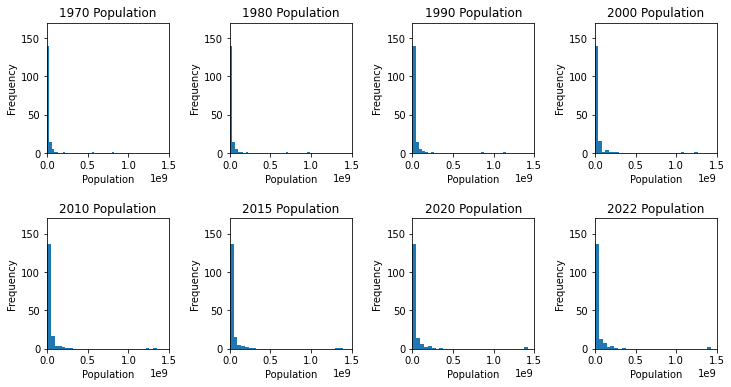

In [232]:
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = ["1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"]

plt.figure(figsize=(12, 6))

for index, c in enumerate(columns_to_plot):
    plt.subplot(2, 4, index+1)
    plt.xlim(0, 1500000000) #we fix the x and y axis so we can compare our histograms over the different decades better
    plt.ylim(0, 170)       #instead of letting matplotlib fix the axis
    plt.hist(df[c].values, bins=30)
    plt.xlabel("Population")
    plt.ylabel("Frequency")
    plt.title(c)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

We have a histogram which is extremely skewed to the left, most countries have values close to 0

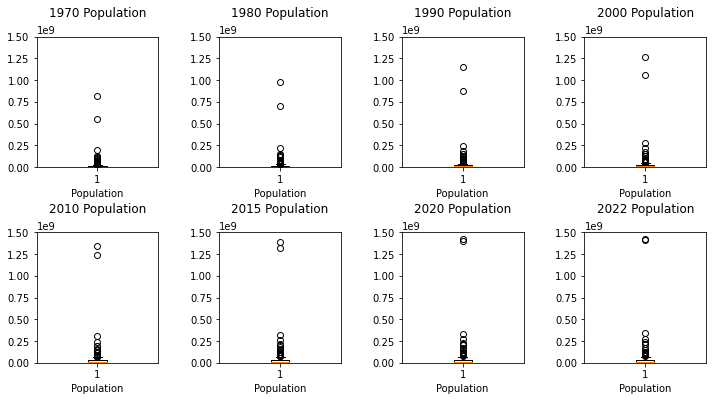

In [233]:
plt.figure(figsize=(12, 6))

for index, c in enumerate(columns_to_plot):
    plt.subplot(2, 4, index+1)
    plt.boxplot(df[c].values)
    plt.ylim(0, 1500000000)
    plt.xlabel("Population")
    plt.title(c, pad=20)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

For the boxplot, we can notice that the distribution is concentrated very near 0 (as in the histogram). However we can also see there are many outlier values. Lets look at those more closely. Outliers can be calculated as values either lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR. Here we don't have any outliers below the lower threshold.

In [234]:
iqr = df["2022 Population"].quantile(0.75) - df["2022 Population"].quantile(0.25)
outliers = df.loc[df["2022 Population"] > df["2022 Population"].quantile(0.75) + 1.5 * iqr]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate


When looking at the outliers for all the population count columns, we can see that the ouliers correspond to the most populated counntries, which we cannot remove as those are countries of interest. Furturemore we can see the 2 furthest away ouliers, China and India which tend to grow faster and get closer to each other over the years.
<br>
If we wanted better looking boxplots we could have used the showfliers parameter (at False) to not plot the Nas, but as we are interessted in knowing which countries are outliers we will not use that parameter. We could also group data to get better looking boxplots, but as we are interessted in the individual countries we won't group the data  either.

Now we can take a look at the distribution of the Area column

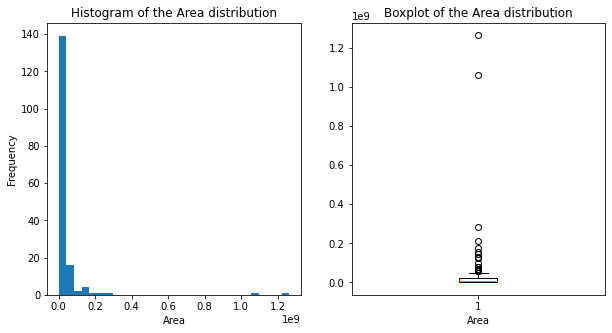

In [235]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df.iloc[:, 9], bins=30) #we use iloc to get the column by position, instead of name as this column contains 
plt.xlabel("Area")               #a special character in the name
plt.ylabel("Frequency")
plt.title("Histogram of the Area distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df.iloc[:, 9])
plt.xlabel("Area")
plt.title("Boxplot of the Area distribution")

plt.show()

In [236]:
iqr = df.iloc[:, 9].quantile(0.75) - df.iloc[:, 9].quantile(0.25) #we use iloc insted as the column name has a special character 
outliers = df.loc[df.iloc[:, 9] > df.iloc[:, 9].quantile(0.75) + 1.5 * iqr]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate


We also have a very left sweked histogram and the same countries show up as outliers for the Area column, with China and India the furthest away from the distribution

For density per squared km we also have a similar distibution:

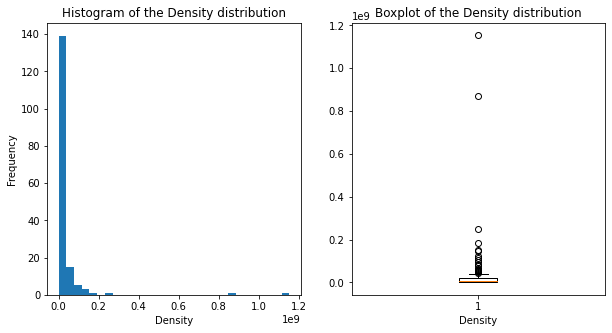

In [237]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df.iloc[:, 10], bins=30) #we use iloc to get the column by position, instead of name as this column also contains 
plt.xlabel("Density")               #a special character in the name
plt.ylabel("Frequency")
plt.title("Histogram of the Density distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df.iloc[:, 10])
plt.xlabel("Density")
plt.title("Boxplot of the Density distribution")

plt.show()

In [238]:
iqr = df.iloc[:, 10].quantile(0.75) - df.iloc[:, 10].quantile(0.25)
outliers = df.loc[df.iloc[:, 10] > df.iloc[:, 10].quantile(0.75) + 1.5 * iqr]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate


Now lets look at the growth rate column

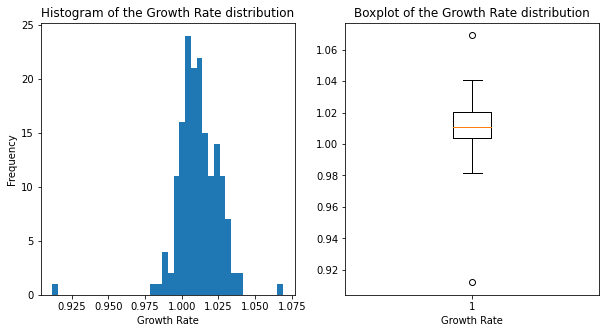

In [239]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Growth Rate"].values, bins=40)
plt.xlabel("Growth Rate")
plt.ylabel("Frequency")
plt.title("Histogram of the Growth Rate distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Growth Rate"].values)
plt.xlabel("Growth Rate")
plt.title("Boxplot of the Growth Rate distribution")

plt.show()

Our histogram seems to approach a normal distribution, and we don't have many outliers. But here we have outliers above and below both thresholds so lets look at those more closely

In [240]:
iqr = df["Growth Rate"].quantile(0.75) - df["Growth Rate"].quantile(0.25)
outliers_above = df.loc[df["Growth Rate"] > df["Growth Rate"].quantile(0.75) + 1.5 * iqr]
outliers_below = df.loc[df["Growth Rate"] < df["Growth Rate"].quantile(0.25) - 1.5 * iqr]
outliers_above

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
127,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04,3435931.0,3174727.0,2997532.0,MD,-0.0039,-0.23,-9300,-1387.0,1.3,38.0,43.0,52.964286,1.0,43.071429,0.035714,49.785714,Moderate,Good,Good,Good,Moderate


In [241]:
outliers_below

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
37,38,UKR,Ukraine,Kiev,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.912,0.5,36744634.0,38295429.0,32867719.0,UA,0.0428,-0.59,-259876,10000.0,1.4,41.0,69.0,51.054795,1.0,37.945205,0.680365,43.684932,Good,Good,Good,Good,Good


Here we have only 2 outliers which could be removed in regards to this column. But as we don't have many rows in our dataframe we will not remove them. <br><br>
For World Population Percentage we have the following plots and outliers:

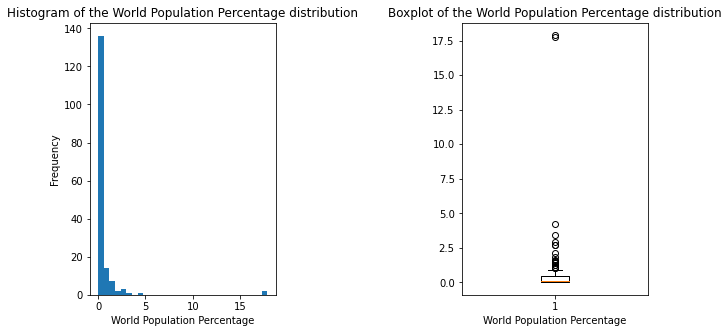

In [242]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["World Population Percentage"].values, bins=30)
plt.xlabel("World Population Percentage")
plt.ylabel("Frequency")
plt.title("Histogram of the World Population Percentage distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["World Population Percentage"].values)
plt.xlabel("World Population Percentage")
plt.title("Boxplot of the World Population Percentage distribution")

plt.subplots_adjust(hspace=0.5, wspace=1) 

plt.show()

In [243]:
iqr = df["World Population Percentage"].quantile(0.75) - df["World Population Percentage"].quantile(0.25)
outliers = df.loc[df["World Population Percentage"] > df["World Population Percentage"].quantile(0.75) + 1.5 * iqr]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate


The distribution of the World Population Percentage is also very skewed to the left and similar countries are also outliers.

When looking at the other Population columns, we get a similar distribution to the other population count columns.

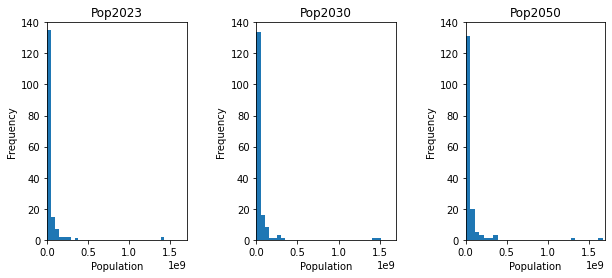

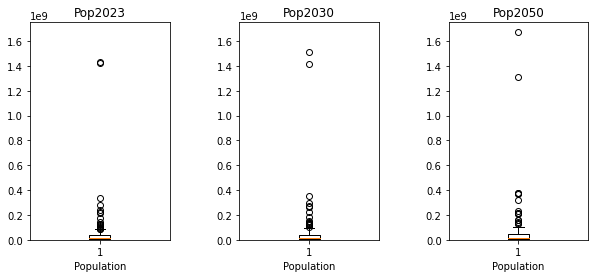

In [244]:
columns_to_plot = ["Pop2023","Pop2030","Pop2050"]

plt.figure(figsize=(10, 4))

for index, c in enumerate(columns_to_plot):
    plt.subplot(1, 3, index+1)
    plt.xlim(0, 1700000000)
    plt.ylim(0, 140)
    plt.hist(df[c].values, bins=30)
    plt.xlabel("Population")
    plt.ylabel("Frequency")
    plt.title(c)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

plt.figure(figsize=(10, 4))

for index, c in enumerate(columns_to_plot):
    plt.subplot(1, 3, index+1)
    plt.boxplot(df[c].values)
    plt.ylim(0, 1750000000)
    plt.xlabel("Population")
    plt.title(c)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

Now lets look at the Net Change column

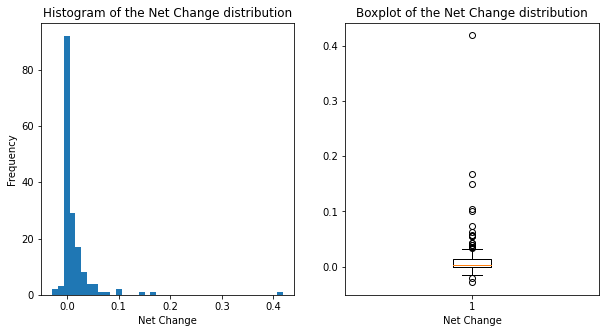

In [245]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["NetChange"].values, bins=40)
plt.xlabel("Net Change")
plt.ylabel("Frequency")
plt.title("Histogram of the Net Change distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["NetChange"].values)
plt.xlabel("Net Change")
plt.title("Boxplot of the Net Change distribution")

plt.show()

Here out histogram is slightly less skewed as we have negative values of Net Change

In [246]:
iqr = df["NetChange"].quantile(0.75) - df["NetChange"].quantile(0.25)
outliers = df.loc[(df["NetChange"] > df["NetChange"].quantile(0.75) + 1.5 * iqr) | (df["NetChange"] < df["NetChange"].quantile(0.25) - 1.5 * iqr)]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
10,11,JPN,Japan,Tokyo,Asia,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55,1.232945e+08,1.185148e+08,1.037844e+08,JP,-0.0209,-0.30,-383840,71560.0,1.4,48.0,92.0,51.723647,1.158120,39.633903,3.511396,41.495726,Good,Good,Good,Good,Good
11,12,ETH,Ethiopia,Addis Ababa,Africa,123379924,117190911,102471895,89237791,67031867,47878073,34945469,28308246,1104300,111.7268,1.0257,1.55,1.265271e+08,1.492964e+08,2.148123e+08,ET,0.1008,2.57,2884858,30000.0,4.3,19.0,21.0,78.731707,0.975610,21.609756,0.048780,78.731707,Moderate,Good,Good,Good,Moderate
12,13,PHL,Philippines,Manila,Asia,115559009,112190977,103031365,94636700,77958223,61558898,48419546,37435586,342353,337.5434,1.0147,1.45,1.173374e+08,1.294533e+08,1.578916e+08,PH,0.0561,1.35,1464463,-67152.0,2.6,26.0,47.0,61.195846,0.967359,22.320475,1.198813,61.053412,Moderate,Good,Good,Good,Moderate


Here we can see we have more outliers than usual as we also have countries with negitive values that are lower than the 1st quartile minus 1.5 iqr threshold. <br><br>
For the Yearly Change distribution, we have a fairly normal distributed histogram and no outliers.

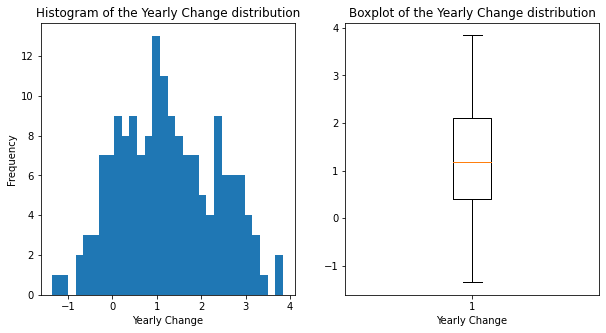

In [247]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Yearly Change"].values, bins=30)
plt.xlabel("Yearly Change")
plt.ylabel("Frequency")
plt.title("Histogram of the Yearly Change distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Yearly Change"].values)
plt.xlabel("Yearly Change")
plt.title("Boxplot of the Yearly Change distribution")

plt.show()

For the Migrants column we have a relatively normal distribution but very spread out.

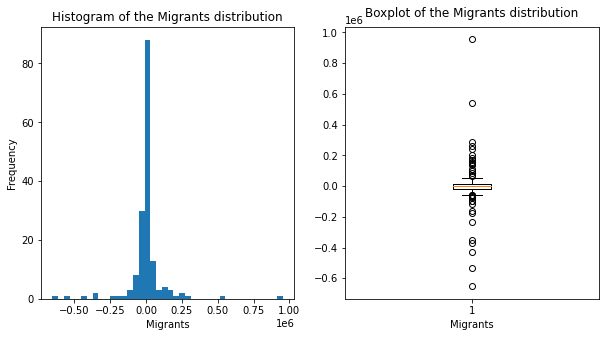

In [248]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Migrants (net)"].values, bins=40)
plt.xlabel("Migrants")
plt.ylabel("Frequency")
plt.title("Histogram of the Migrants distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Migrants (net)"].values)
plt.xlabel("Migrants")
plt.title("Boxplot of the Migrants distribution", pad=10)

plt.show()

In [249]:
iqr = df["Migrants (net)"].quantile(0.75) - df["Migrants (net)"].quantile(0.25)
outliers = df.loc[(df["Migrants (net)"] > df["Migrants (net)"].quantile(0.75) + 1.5 * iqr) | (df["Migrants (net)"] < df["Migrants (net)"].quantile(0.25) - 1.5 * iqr)]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate
10,11,JPN,Japan,Tokyo,Asia,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55,1.232945e+08,1.185148e+08,1.037844e+08,JP,-0.0209,-0.30,-383840,71560.0,1.4,48.0,92.0,51.723647,1.158120,39.633903,3.511396,41.495726,Good,Good,Good,Good,Good


We have a lot of different countries that are outliers as the distribution is centered around 0 but there are many extreme values (either postive or negative) <br> <br>
For the fertility rate, the distribution is skewed to the left and there is only one extreme outlier for Niger which has a fertitlity rate of 7. We chose to not remove this outlier as we don't have many rows and that particular row does not have many other extreme values for the other columns.

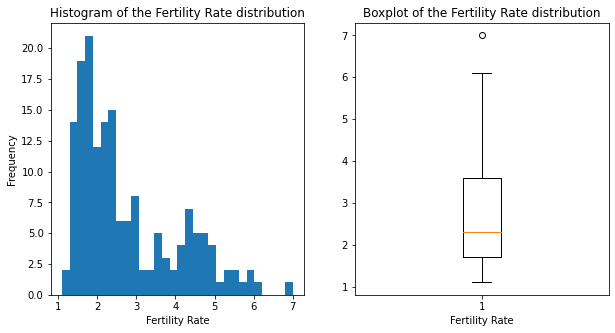

In [250]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Fert. Rate"].values, bins=30)
plt.xlabel("Fertility Rate")
plt.ylabel("Frequency")
plt.title("Histogram of the Fertility Rate distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Fert. Rate"].values)
plt.xlabel("Fertility Rate")
plt.title("Boxplot of the Fertility Rate distribution")

plt.show()

In [251]:
iqr = df["Fert. Rate"].quantile(0.75) - df["Fert. Rate"].quantile(0.25)
outliers = df.loc[(df["Fert. Rate"] > df["Fert. Rate"].quantile(0.75) + 1.5 * iqr)]
outliers

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
52,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33,27202843.0,35217942.0,67043296.0,NE,0.0321,3.84,895929,4000.0,7.0,15.0,17.0,75.689655,1.517241,30.965517,0.758621,75.689655,Moderate,Good,Good,Good,Moderate


For Median Age we do not have a normal distribution and we do not have any outliers.

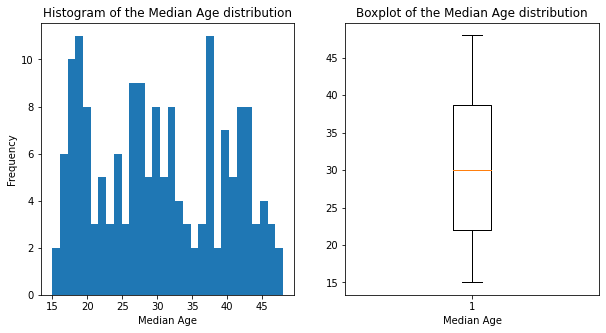

In [252]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Med. Age"].values, bins=30)
plt.xlabel("Median Age")
plt.ylabel("Frequency")
plt.title("Histogram of the Median Age distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Med. Age"].values)
plt.xlabel("Median Age")
plt.title("Boxplot of the Median Age distribution")

plt.show()

For the Urban Population we have a somewhat normal distribution

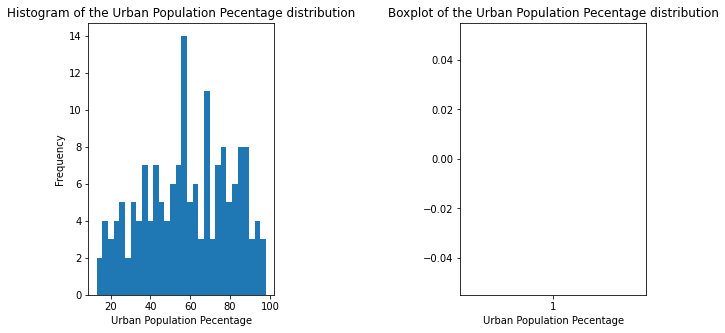

In [253]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Urban Pop %"].values, bins=30)
plt.xlabel("Urban Population Pecentage")
plt.ylabel("Frequency")
plt.title("Histogram of the Urban Population Pecentage distribution")

plt.subplot(1, 2, 2)
plt.boxplot([df["Urban Pop %"].values])
plt.xlabel("Urban Population Pecentage")
plt.title("Boxplot of the Urban Population Pecentage distribution")

plt.subplots_adjust(hspace=0.5, wspace=1) 
plt.show()

For the pollution indicators, we have distributions skewed to the left. CO AQI Value and NO2 AQI Value as well as AQI Value and PM2.5 AQI Value have quite similar distributions.

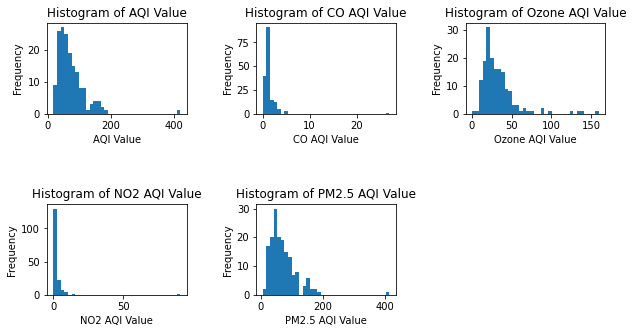

In [254]:
columns_to_plot = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value","PM2.5 AQI Value"]

plt.figure(figsize=(10, 5))

for index, c in enumerate(columns_to_plot):
    plt.subplot(2, 3, index+1)
    plt.hist(df[c].values, bins=35)
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.title("Histogram of "+c)

plt.subplots_adjust(hspace=1, wspace=0.5) 
plt.show()

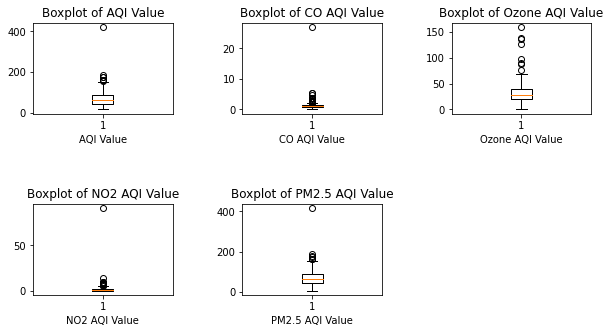

In [255]:
plt.figure(figsize=(10, 5))

for index, c in enumerate(columns_to_plot):
    plt.subplot(2, 3, index+1)
    plt.boxplot(df[c].values)
    plt.xlabel(c)
    plt.title("Boxplot of "+c)

plt.subplots_adjust(hspace=1, wspace=0.5) 
plt.show()

In [256]:
for c in columns_to_plot:
    iqr = df[c].quantile(0.75) - df[c].quantile(0.25)
    outliers = df.loc[(df[c] > df[c].quantile(0.75) + 1.5 * iqr)]
    print(c)
    print(outliers)

AQI Value
     Rank CCA3               Country      Capital      Continent  \
4       5  PAK              Pakistan    Islamabad           Asia   
28     29  KOR           South Korea        Seoul           Asia   
92     97  ARE  United Arab Emirates    Abu Dhabi           Asia   
118   126  MRT            Mauritania   Nouakchott         Africa   
121   129  KWT                Kuwait  Kuwait City           Asia   
134   143  QAT                 Qatar         Doha           Asia   
145   154  BHR               Bahrain       Manama           Asia   
165   198  ABW                 Aruba   Oranjestad  North America   

     2022 Population  2020 Population  2015 Population  2010 Population  \
4          235824862        227196741        210969298        194454498   
28          51815810         51844690         50994401         48813042   
92           9441129          9287289          8916899          8481771   
118          4736139          4498604          3946220          3419461   
12

     Rank CCA3               Country      Capital Continent  2022 Population  \
0       1  CHN                 China      Beijing      Asia       1425887337   
4       5  PAK              Pakistan    Islamabad      Asia        235824862   
40     41  SAU          Saudi Arabia       Riyadh      Asia         36408820   
92     97  ARE  United Arab Emirates    Abu Dhabi      Asia          9441129   
119   127  OMN                  Oman       Muscat      Asia          4576298   
121   129  KWT                Kuwait  Kuwait City      Asia          4268873   
134   143  QAT                 Qatar         Doha      Asia          2695122   
145   154  BHR               Bahrain       Manama      Asia          1472233   

     2020 Population  2015 Population  2010 Population  2000 Population  \
0         1424929781       1393715448       1348191368       1264099069   
4          227196741        210969298        194454498        154369924   
40          35997107         32749848         29411929

     Rank CCA3      Country      Capital      Continent  2022 Population  \
4       5  PAK     Pakistan    Islamabad           Asia        235824862   
28     29  KOR  South Korea        Seoul           Asia         51815810   
118   126  MRT   Mauritania   Nouakchott         Africa          4736139   
121   129  KWT       Kuwait  Kuwait City           Asia          4268873   
145   154  BHR      Bahrain       Manama           Asia          1472233   
165   198  ABW        Aruba   Oranjestad  North America           106445   

     2020 Population  2015 Population  2010 Population  2000 Population  \
4          227196741        210969298        194454498        154369924   
28          51844690         50994401         48813042         46788591   
118          4498604          3946220          3419461          2695003   
121          4360444          3908743          2943356          1934901   
145          1477469          1362142          1213645           711442   
165           106

The outliers for AQI Category and PM2.5 AQI Category (as they have similar distributions they have mostly the same countries) corespond to the Unhealthy or Hazardous extreme levels of pollution. These values are of interest, so we won't remove them as we want to understand the factors behind pollution.
The outliers for Ozone AQI Value are mainly Moderate, Unhealthy for Sensitive Groups and Unhealthy levels of pollution.
The outliers for CO AQI Value and NO2 AQI Value also corespond to the mostly the same countries (as they have similar distributions) with Good levels of pollution. <br>
These findings can be confirmed by looking at our categorial vairables :

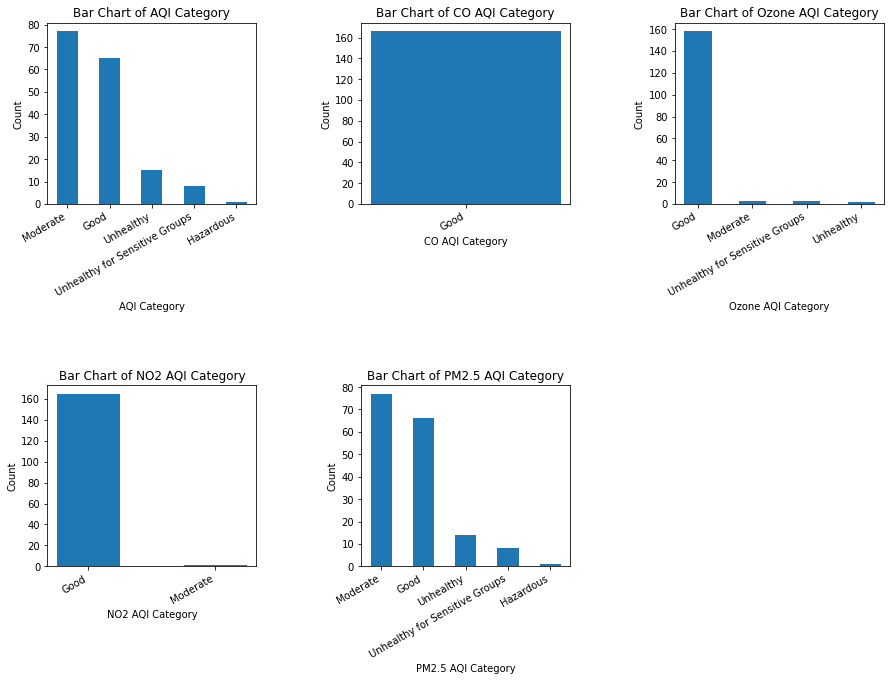

In [257]:
columns_to_plot = ["AQI Category","CO AQI Category","Ozone AQI Category","NO2 AQI Category","PM2.5 AQI Category"]

plt.figure(figsize=(15, 10))

for index, c in enumerate(columns_to_plot):
    plt.subplot(2, 3, index+1)
    plt.bar(df[c].value_counts().index, df[c].value_counts().values, width=0.5, align='center')
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.title("Bar Chart of "+c)
    plt.xticks(rotation=30, ha="right")

plt.subplots_adjust(hspace=1, wspace=0.5) 
plt.show()

As we saw previously CO AQI and N02 AQI have almost exclusively a Good level of pollution, which is why the outliers were still in the good category and not unhealthy. For the other pollution indicators, we have a majority of Moderate or Good countries and only few Unhealthy  or Hazardous, which are the outliers.


We can aslo look at the bar chart for the Continent column

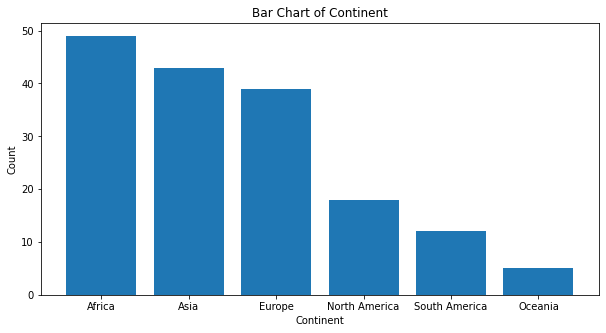

In [258]:
plt.figure(figsize=(10, 5))
plt.bar(df["Continent"].value_counts().index, df["Continent"].value_counts().values)
plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Bar Chart of Continent")
plt.show()

We can see that the most countries are from Africa, Asia and Europe.

We can also inspect the correlation between varibales, as for part 3 we want to have an idea of which variables could explain the pollution levels. <br>

We have the correlation matrix of the quantitative variables of df:

In [259]:
corr_matrix = df.corr()
corr_matrix

C:\Users\olyff\AppData\Local\Temp\ipykernel_13132\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
Rank,1.000000,-0.385581,-0.383031,-0.378289,-0.374424,-0.367748,-0.362144,-0.360749,-0.360566,-0.391860,0.091468,-0.111596,-0.385533,-0.386867,-0.395890,-0.422394,-0.410101,-0.145548,-0.448460,-0.021938,-0.153835,0.127931,0.001425,-0.147525,-0.212680,-0.011583,-0.159219,-0.143837
2022 Population,-0.385581,1.000000,0.999946,0.999486,0.998618,0.994535,0.987026,0.979944,0.972670,0.438843,0.002195,-0.054261,0.999999,0.999983,0.998863,0.986050,0.631992,-0.041557,0.858800,-0.272631,-0.053495,0.021622,-0.040946,0.192502,0.101158,0.190600,0.067600,0.174073
2020 Population,-0.383031,0.999946,1.000000,0.999761,0.999096,0.995523,0.988541,0.981808,0.974797,0.440647,0.002234,-0.058616,0.999944,0.999869,0.998327,0.984314,0.624456,-0.045554,0.853544,-0.271033,-0.057585,0.025782,-0.038005,0.191135,0.100778,0.191176,0.068393,0.172496
2015 Population,-0.378289,0.999486,0.999761,1.000000,0.999781,0.997300,0.991450,0.985467,0.979027,0.444322,0.002392,-0.065714,0.999484,0.999291,0.996854,0.980334,0.607922,-0.054369,0.842156,-0.268522,-0.066345,0.034811,-0.032253,0.188446,0.100144,0.192593,0.070174,0.169356
2010 Population,-0.374424,0.998618,0.999096,0.999781,1.000000,0.998570,0.993821,0.988579,0.982719,0.448413,0.002346,-0.071589,0.998615,0.998311,0.995039,0.976191,0.592181,-0.062079,0.831103,-0.265346,-0.074371,0.043376,-0.027081,0.185163,0.099115,0.193445,0.071277,0.165657
2000 Population,-0.367748,0.994535,0.995523,0.997300,0.998570,1.000000,0.998306,0.995070,0.990786,0.461272,0.001422,-0.084430,0.994529,0.993946,0.988542,0.963995,0.550464,-0.077279,0.802325,-0.253650,-0.088640,0.060492,-0.015552,0.177513,0.099404,0.194052,0.075274,0.157040
1990 Population,-0.362144,0.987026,0.988541,0.991450,0.993821,0.998306,1.000000,0.999024,0.996539,0.474795,-0.000125,-0.096813,0.987017,0.986144,0.978534,0.948232,0.504973,-0.091472,0.769868,-0.239575,-0.100691,0.077818,-0.003270,0.168839,0.100186,0.194856,0.079225,0.147301
1980 Population,-0.360749,0.979944,0.981808,0.985467,0.988579,0.995070,0.999024,1.000000,0.999179,0.486613,-0.001420,-0.107486,0.979934,0.978872,0.969873,0.936021,0.474659,-0.104192,0.746092,-0.217914,-0.110698,0.093987,0.008146,0.159047,0.098558,0.192782,0.081811,0.136836
1970 Population,-0.360566,0.972670,0.974797,0.979027,0.982719,0.990786,0.996539,0.999179,1.000000,0.498727,-0.002161,-0.117266,0.972659,0.971457,0.961437,0.925057,0.450988,-0.115323,0.726304,-0.194211,-0.119603,0.108750,0.017647,0.150513,0.096922,0.191256,0.083778,0.127737
Area (km²),-0.391860,0.438843,0.440647,0.444322,0.448413,0.461272,0.474795,0.486613,0.498727,1.000000,-0.084654,-0.056692,0.438683,0.437959,0.430591,0.410675,0.141745,-0.041916,0.283003,0.223931,-0.062408,0.083433,0.159273,-0.027886,0.011114,0.020009,0.031699,-0.042630


We are going to plot a heatmap to be able to see the highly correlated variables better. We use the seaborn library as the heatmap() function allows to build a plot easier than using the imshow() of matplotlib:

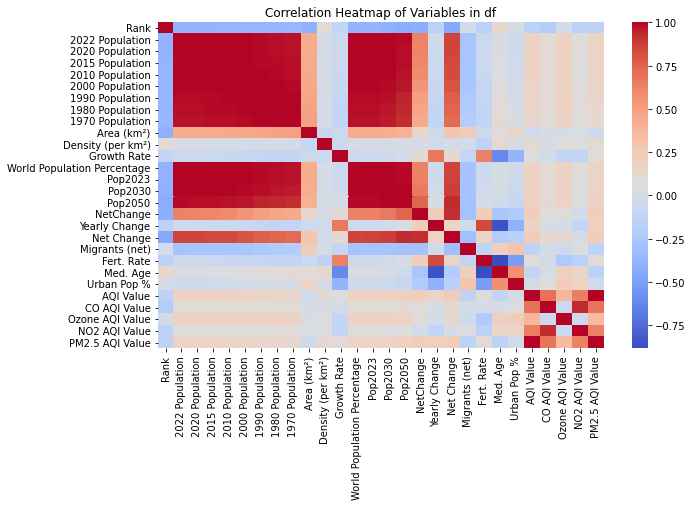

In [260]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm') 
plt.title('Correlation Heatmap of Variables in df')
plt.show()

A few unsurprising things can be noticed. First we can see that all the population count columns (1970 Population to 2020 Population, Pop2023, Pop2030, Pop2050) are highly correlated which makes sense as the population distribution over the countries and over the years shouldn't vary much. Then we can also see that the Pollution indicators are all relatively highly correlated (except for Ozone AQI which is slightly negitively correlated with CO AQI and NO2 AQI) which also seems reasonable as an area that is polluted is likely to polluted by multiple different gas.
<br>
What seems a little surprising is that the pollution indicators are not very correlated (less than 0.2) to the other columns such as the population count colunms. This is a bit strange as often the generally the most populated countries have the most polluted cities.

Let's can see if taking a smaller subset of the most populated countries changes the correlation found (as the potential correlation might be drown out by including so many different smaller countries)

In [261]:
subset = df.loc[df["World Population Percentage"] > 1.5] #we take only the most significant countries in terms of population count
subset

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,3.399966e+08,3.521623e+08,3.753920e+08,US,0.0581,0.59,1937734,954806.0,1.8,38.0,83.0,59.740599,1.456825,27.619777,8.541435,58.051532,Moderate,Good,Good,Good,Moderate
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,2.775341e+08,2.921501e+08,3.172252e+08,ID,0.0727,1.07,2898047,-98955.0,2.3,30.0,56.0,93.036939,2.424802,46.569921,3.741425,90.833773,Moderate,Good,Good,Good,Moderate
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,2.238046e+08,2.625804e+08,3.774599e+08,NG,0.1680,2.58,5175990,-60000.0,5.4,18.0,52.0,99.611111,3.812500,24.854167,2.270833,99.611111,Moderate,Good,Good,Good,Moderate
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,2.164224e+08,2.239090e+08,2.308857e+08,BR,0.0393,0.72,1509890,21200.0,1.7,33.0,88.0,44.574904,1.004481,12.479513,2.272087,44.023047,Good,Good,Good,Good,Good
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1.729543e+08,1.844241e+08,2.039049e+08,BD,0.0557,1.01,1643222,-369501.0,2.1,28.0,39.0,113.462500,2.437500,46.200000,3.037500,112.787500,Moderate,Good,Good,Good,Moderate
8,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1.444444e+08,1.414327e+08,1.331330e+08,RU,-0.0158,0.04,62206,182456.0,1.8,40.0,74.0,42.506849,1.041902,34.132957,1.111201,34.513296,Good,Good,Good,Good,Good
9,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60,1.284556e+08,1.345341e+08,1.437724e+08,MX,0.0299,1.06,1357224,-60000.0,2.1,29.0,84.0,89.537415,1.750000,16.824830,4.926871,89.292517,Moderate,Good,Good,Good,Moderate


C:\Users\olyff\AppData\Local\Temp\ipykernel_13132\1257593025.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset.corr(), cmap='coolwarm')


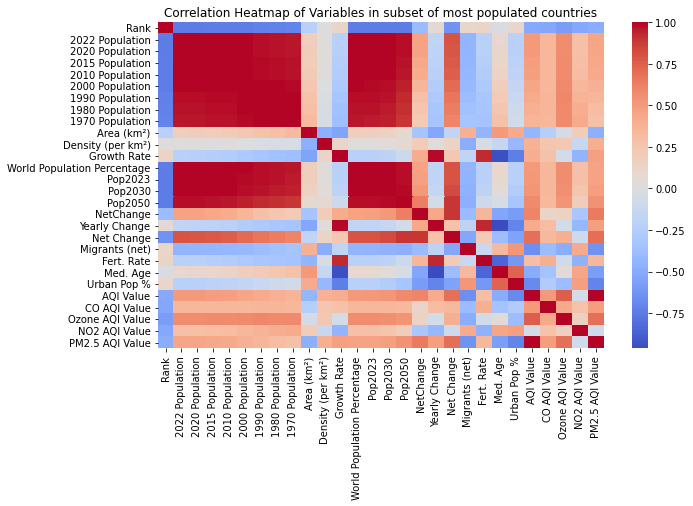

In [262]:
plt.figure(figsize=(10, 6))
sns.heatmap(subset.corr(), cmap='coolwarm') 
plt.title('Correlation Heatmap of Variables in subset of most populated countries')
plt.show()

As we can see when isolating on a smaller subset of the most populated and most contributing countries, we find more expected results. The pollution indicators are positively correlated with the population counts, the world population percentage and the net change. However surprisingly they seem to be negatively correlated with the Urban population percentage. <br>
We can look at the correlation between the pollution indicators and the Urban Population percentage in more detail on a scatter plot. We use the regression plot of the seaborn library instead of the normal scatter plot of matplotlib as we want the regression line:

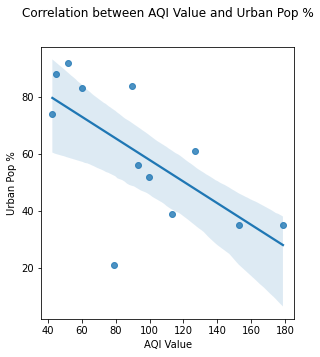

In [263]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x="AQI Value", y="Urban Pop %", data=subset)

#plt.scatter(subset["AQI Value"].values, subset["Urban Pop %"].values)
plt.xlabel("AQI Value")
plt.ylabel("Urban Pop %")
plt.title("Correlation between AQI Value and Urban Pop %", pad=30)
 
plt.show()

We can see that there is indeed a clear negative trend.

We can also take a subset of the most polluted countries and see how that affects the correlation between varibles, as it might give us better insights as to which variables influence the pollution levels:

In [264]:
subset = df.loc[(df["AQI Category"]=="Unhealthy") | (df["AQI Category"]=="Hazardous")] 
#we take only the most polluted countries based on the overall air quaility
subset

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,1.425671e+09,1.415606e+09,1.312636e+09,CN,-0.0113,0.39,5540090,-348399.0,1.7,38.0,61.0,126.953459,3.417610,88.319497,7.093082,111.703145,Unhealthy,Good,Good,Good,Moderate
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
28,29,KOR,South Korea,Seoul,Asia,51815810,51844690,50994401,48813042,46788591,44120039,38170501,32601143,100210,517.0722,0.9997,0.65,5.178406e+07,5.129021e+07,4.577087e+07,KR,-0.0012,0.09,43877,11731.0,1.1,44.0,82.0,421.000000,27.000000,0.000000,91.000000,415.000000,Hazardous,Good,Good,Moderate,Hazardous
40,41,SAU,Saudi Arabia,Riyadh,Asia,36408820,35997107,32749848,29411929,21547390,16004763,10171710,6106191,2149690,16.9368,1.0128,0.46,3.694702e+07,4.046137e+07,4.837454e+07,SA,0.0169,1.59,545343,134979.0,2.3,32.0,84.0,149.285714,1.285714,77.071429,0.642857,149.285714,Unhealthy,Good,Moderate,Good,Unhealthy
45,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,3.444982e+07,3.992324e+07,5.529633e+07,YE,0.0240,2.28,664042,-30000.0,3.8,20.0,38.0,144.571429,1.285714,55.428571,0.714286,144.571429,Unhealthy,Good,Good,Good,Unhealthy
68,72,SEN,Senegal,Dakar,Africa,17316449,16436119,14356181,12530121,9704287,7536001,5703869,4367744,196722,88.0250,1.0261,0.22,1.776316e+07,2.112587e+07,3.256287e+07,SN,0.0144,2.75,447563,-20000.0,4.7,19.0,49.0,152.424242,1.393939,22.000000,1.878788,152.424242,Unhealthy,Good,Good,Good,Unhealthy
92,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129,9287289,8916899,8481771,3275333,1900151,1014048,298084,83600,112.9322,1.0081,0.12,9.516871e+06,1.000432e+07,1.144947e+07,AE,0.0024,1.23,119873,40000.0,1.4,33.0,86.0,163.666667,1.333333,159.666667,3.333333,152.666667,Unhealthy,Good,Unhealthy,Good,Unhealthy
118,126,MRT,Mauritania,Nouakchott,Africa,4736139,4498604,3946220,3419461,2695003,2006027,1506694,1122198,1030700,4.5951,1.0263,0.06,4.862989e+06,5.830563e+06,8.914673e+06,MR,0.0041,2.74,123962,5000.0,4.6,20.0,57.0,179.000000,0.750000,28.500000,0.000000,179.000000,Unhealthy,Good,Good,Good,Unhealthy
119,127,OMN,Oman,Muscat,Asia,4576298,4543399,4191776,2881914,2344253,1804524,1017462,670693,309500,14.7861,1.0123,0.06,4.644384e+06,5.093376e+06,6.328978e+06,OM,0.0022,2.65,131640,87400.0,2.9,31.0,87.0,137.500000,1.333333,97.833333,1.833333,134.833333,Unhealthy,Good,Unhealthy for Sensitive Groups,Good,Unhealthy


We have the following heatmap

C:\Users\olyff\AppData\Local\Temp\ipykernel_13132\1501047048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset.corr(), cmap='coolwarm')


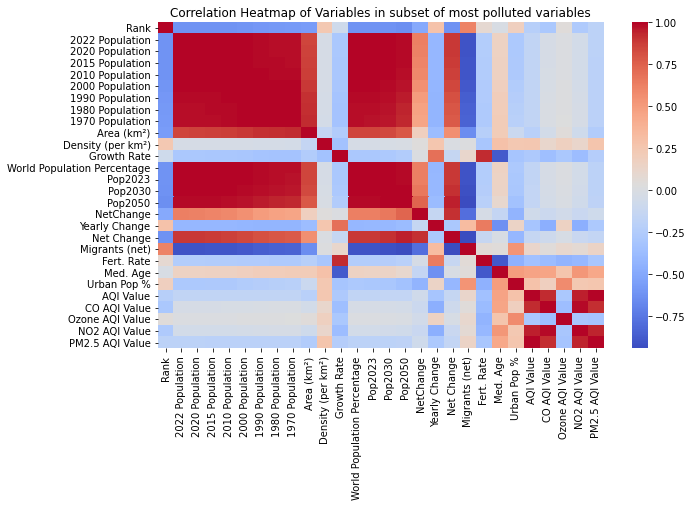

In [265]:
plt.figure(figsize=(10, 6))
sns.heatmap(subset.corr(), cmap='coolwarm') 
plt.title('Correlation Heatmap of Variables in subset of most polluted variables')
plt.show()

Here the most correlated variables to the pollution indicators are Density per squared km, Median Age, and Urban Population Percentage. As we had seen previously when looking at the distributions of the pollution indicators AQI and PM2.5 AQI had similar distributions, and CO AQI and NO2 AQI also had similar distributions. But they all differed from Ozone AQI which explains the negative correlation with Ozone AQI.

We can also notice that the pollution indicators are not very correlated with the population count columns, because when looking at the countries in our subset we have quite a few smaller less populated countries.

## Part 3 

We are interessted in finding the most important factors contributing to pollution in order to recommend policies to reduce the levels of pollution. The heat maps exploring the correlation between variables, showed that different variables influence the pollution indicators. The pollution could also be explained by the number of industries and fatories, but we do not have that data in our data set.


Q1) Which are the most polluted cities (based on the overall air quality)?

In [266]:
most_polluted_cities = df2.sort_values(by="AQI Value", ascending=False)#we sort by descending value
most_polluted_cities = most_polluted_cities[:20]#we take the 1st 20 cities
most_polluted_cities

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
9107,India,Faridnagar,500,Hazardous,1,Good,45,Good,2,Good,496,Hazardous
8101,India,Gopamau,500,Hazardous,1,Good,52,Moderate,1,Good,378,Hazardous
12721,India,Jalalabad,500,Hazardous,1,Good,48,Good,1,Good,500,Hazardous
17141,India,Pilibanga,500,Hazardous,1,Good,43,Good,0,Good,470,Hazardous
6990,India,Nuh,500,Hazardous,1,Good,44,Good,1,Good,420,Hazardous
12354,India,Hansi,500,Hazardous,1,Good,55,Moderate,0,Good,464,Hazardous
2858,India,Bareli,500,Hazardous,1,Good,68,Moderate,1,Good,478,Hazardous
20567,India,Sasni,500,Hazardous,1,Good,46,Good,1,Good,433,Hazardous
22259,Russia,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous
21639,India,Jhunjhunun,500,Hazardous,1,Good,38,Good,0,Good,433,Hazardous


We can see that the most polluted cities are from India and one is from Russia

Q2) What are the top 10 best and worst countries in terms of overall air quality?

In [267]:
worst_countries = df.sort_values(by="AQI Value", ascending=False)
worst_countries = worst_countries[:10]
worst_countries

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
28,29,KOR,South Korea,Seoul,Asia,51815810,51844690,50994401,48813042,46788591,44120039,38170501,32601143,100210,517.0722,0.9997,0.65,5.178406e+07,5.129021e+07,4.577087e+07,KR,-0.0012,0.09,43877,11731.0,1.1,44.0,82.0,421.000000,27.000000,0.000000,91.000000,415.000000,Hazardous,Good,Good,Moderate,Hazardous
145,154,BHR,Bahrain,Manama,Asia,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.4876,1.0061,0.02,1.485509e+06,1.574679e+06,1.809237e+06,BH,0.0004,3.68,60403,47800.0,2.0,32.0,89.0,188.000000,2.000000,127.000000,3.000000,188.000000,Unhealthy,Good,Unhealthy for Sensitive Groups,Good,Unhealthy
118,126,MRT,Mauritania,Nouakchott,Africa,4736139,4498604,3946220,3419461,2695003,2006027,1506694,1122198,1030700,4.5951,1.0263,0.06,4.862989e+06,5.830563e+06,8.914673e+06,MR,0.0041,2.74,123962,5000.0,4.6,20.0,57.0,179.000000,0.750000,28.500000,0.000000,179.000000,Unhealthy,Good,Good,Good,Unhealthy
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,2.404857e+08,2.740298e+08,3.678085e+08,PK,0.1495,2.00,4327022,-233379.0,3.6,23.0,35.0,178.788274,2.074919,89.143322,2.074919,173.110749,Unhealthy,Good,Good,Good,Unhealthy
92,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129,9287289,8916899,8481771,3275333,1900151,1014048,298084,83600,112.9322,1.0081,0.12,9.516871e+06,1.000432e+07,1.144947e+07,AE,0.0024,1.23,119873,40000.0,1.4,33.0,86.0,163.666667,1.333333,159.666667,3.333333,152.666667,Unhealthy,Good,Unhealthy,Good,Unhealthy
165,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00,1.062770e+05,1.049240e+05,9.418500e+04,AW,0.0000,0.43,452,201.0,1.9,41.0,44.0,163.000000,0.000000,23.000000,0.000000,163.000000,Unhealthy,Good,Good,Good,Unhealthy
121,129,KWT,Kuwait,Kuwait City,Asia,4268873,4360444,3908743,2943356,1934901,1674938,1493870,802786,17818,239.5821,1.0044,0.05,4.310108e+06,4.564570e+06,5.155414e+06,KW,0.0013,1.51,63488,39520.0,2.1,37.0,NaN,162.000000,2.666667,135.666667,13.666667,162.000000,Unhealthy,Good,Unhealthy for Sensitive Groups,Good,Unhealthy
134,143,QAT,Qatar,Doha,Asia,2695122,2760385,2414573,1713504,645937,441675,277450,118007,11586,232.6189,1.0026,0.03,2.716391e+06,2.855291e+06,3.358454e+06,QA,0.0007,1.73,48986,40000.0,1.9,32.0,96.0,157.500000,1.000000,139.000000,1.500000,147.500000,Unhealthy,Good,Unhealthy,Good,Unhealthy
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,1.428628e+09,1.514994e+09,1.670491e+09,IN,0.4184,0.99,13586631,-532687.0,2.2,28.0,35.0,152.964228,1.743569,55.061495,1.965032,149.463023,Unhealthy,Good,Good,Good,Unhealthy
68,72,SEN,Senegal,Dakar,Africa,17316449,16436119,14356181,12530121,9704287,7536001,5703869,4367744,196722,88.0250,1.0261,0.22,1.776316e+07,2.112587e+07,3.256287e+07,SN,0.0144,2.75,447563,-20000.0,4.7,19.0,49.0,152.424242,1.393939,22.000000,1.878788,152.424242,Unhealthy,Good,Good,Good,Unhealthy


In [268]:
best_countries = df.sort_values(by="AQI Value")
best_countries = best_countries[:10]
best_countries

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop2023,Pop2030,Pop2050,Cca2,NetChange,Yearly Change,Net Change,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
153,166,SLB,Solomon Islands,Honiara,Oceania,724273,691191,612660,540394,429978,324171,233668,172833,28896,25.0648,1.0232,0.01,740424.0,856264.0,1225407.0,SB,0.0005,2.55,17061,-1600.0,4.4,20.0,23.0,18.000000,0.000000,18.000000,0.000000,6.000000,Good,Good,Good,Good,Good
158,174,MDV,Maldives,Malé,Asia,523787,514438,435582,361575,282507,224957,164887,123243,300,1745.9567,1.0045,0.01,521021.0,512683.0,569909.0,MV,-0.0001,1.81,9591,11370.0,1.9,30.0,35.0,19.000000,0.000000,19.000000,0.000000,15.000000,Good,Good,Good,Good,Good
160,179,ISL,Iceland,Reykjavík,Europe,372899,366669,331060,318333,281462,255019,228263,204468,103000,3.6204,1.0069,0.00,375318.0,390338.0,408783.0,IS,0.0001,0.65,2212,380.0,1.8,37.0,94.0,23.000000,1.000000,23.000000,0.000000,18.333333,Good,Good,Good,Good,Good
76,80,BOL,Bolivia,Sucre,South America,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,1098581,11.1272,1.0120,0.15,12388571.0,13625507.0,16609854.0,BO,0.0057,1.39,159921,-9504.0,2.8,26.0,69.0,23.787879,0.484848,8.333333,0.212121,23.242424,Good,Good,Good,Good,Good
88,93,PNG,Papua New Guinea,Port Moresby,Oceania,10142619,9749640,8682174,7583269,5508297,3864972,3104788,2489059,462840,21.9139,1.0194,0.13,10329931.0,11615322.0,14910369.0,PG,0.0059,1.95,170915,-800.0,3.6,22.0,13.0,24.866667,0.000000,15.733333,0.066667,20.533333,Good,Good,Good,Good,Good
152,165,BTN,Bhutan,Thimphu,Asia,782455,772506,743274,705516,587207,558442,415257,298894,38394,20.3796,1.0064,0.01,787424.0,821498.0,874294.0,BT,0.0002,1.12,8516,320.0,2.0,28.0,46.0,26.000000,1.000000,21.000000,0.000000,26.000000,Good,Good,Good,Good,Good
164,196,SYC,Seychelles,Victoria,Africa,107118,105530,99240,92409,80060,71057,65290,54379,452,236.9867,1.0061,0.00,107660.0,111317.0,116644.0,SC,0.0000,0.62,608,-200.0,2.5,34.0,56.0,26.000000,0.000000,25.000000,0.000000,26.000000,Good,Good,Good,Good,Good
125,133,URY,Uruguay,Montevideo,South America,3422794,3429086,3402818,3352651,3292224,3117012,2953750,2790265,181034,18.9069,0.9990,0.04,3423108.0,3423372.0,3337143.0,UY,0.0000,0.35,11996,-3000.0,2.0,36.0,96.0,26.653846,0.192308,18.961538,0.846154,21.692308,Good,Good,Good,Good,Good
32,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57,45773884.0,47678560.0,51621175.0,AR,0.0091,0.93,415097,4800.0,2.3,32.0,93.0,28.235294,0.352941,15.485294,1.544118,24.867647,Good,Good,Good,Good,Good
161,181,VUT,Vanuatu,Port-Vila,Oceania,326740,311685,276438,245453,192074,150882,118156,87019,12189,26.8061,1.0238,0.00,334506.0,391135.0,578567.0,VU,0.0002,2.42,7263,120.0,3.8,21.0,24.0,30.000000,0.000000,25.000000,0.000000,30.000000,Good,Good,Good,Good,Good


We want to know which areas generate the most pollution, in order to implement regional stratigies and pollicies to decrease the pollution.

Q3) Which contient generates the most pollution?

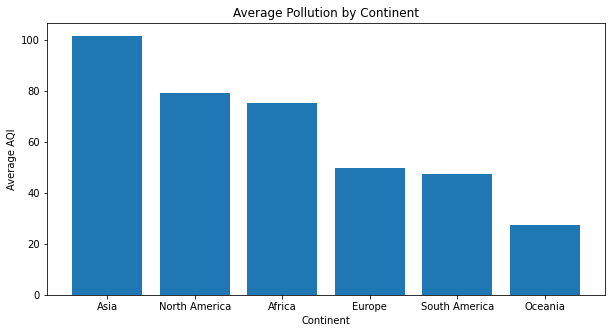

In [269]:
#fist we get the AQI Value grouped by continent
average_pollution_by_continent = df.groupby("Continent")["AQI Value"].mean()
#we sort by descending order to get a nicer looking bar chart
average_pollution_by_continent = average_pollution_by_continent.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(average_pollution_by_continent.index, average_pollution_by_continent.values)
plt.xlabel("Continent")
plt.ylabel("Average AQI")
plt.title("Average Pollution by Continent")
plt.show()


We can see that Asia is the most polluted countries, as there are many emmerging countries that generate lots of pollution. 

Q4) We want to know which pollution indicators affect the overall air quality the most. <br>
We plot a line chart of the different pollution indicators for the worst countries in terms of pollution

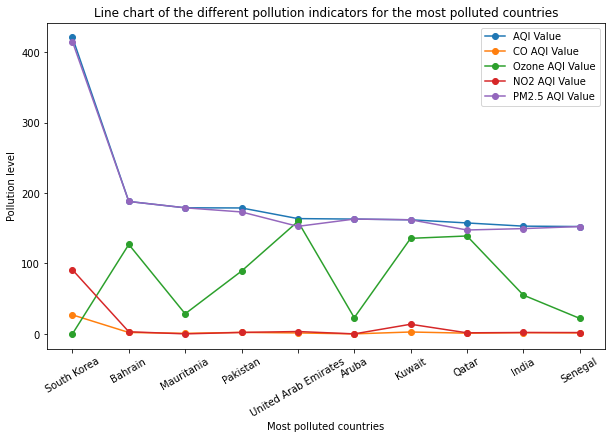

In [270]:
plt.figure(figsize=(10, 6))

plt.plot(worst_countries["Country"], worst_countries["AQI Value"], label="AQI Value", marker='o')
plt.plot(worst_countries["Country"], worst_countries["CO AQI Value"], label="CO AQI Value", marker='o')
plt.plot(worst_countries["Country"], worst_countries["Ozone AQI Value"], label="Ozone AQI Value", marker='o')
plt.plot(worst_countries["Country"], worst_countries["NO2 AQI Value"], label="NO2 AQI Value", marker='o')
plt.plot(worst_countries["Country"], worst_countries["PM2.5 AQI Value"], label="PM2.5 AQI Value", marker='o')

plt.xlabel("Most polluted countries")
plt.ylabel("Pollution level")
plt.title("Line chart of the different pollution indicators for the most polluted countries")
plt.xticks(rotation="30")#we rotate to fix the overlapping labels
plt.legend()

plt.show()

We can clearly see that PM 2.5 is the main factor that affects the overall air quality(AQI), as we can see that the PM2.5 value is always very close to the the AQI value for all the countries. This is also confirmed when looking at the line chart for the least polluted cities, though we can see that the Ozone level also seems to contribute to the overall air quality but not as much

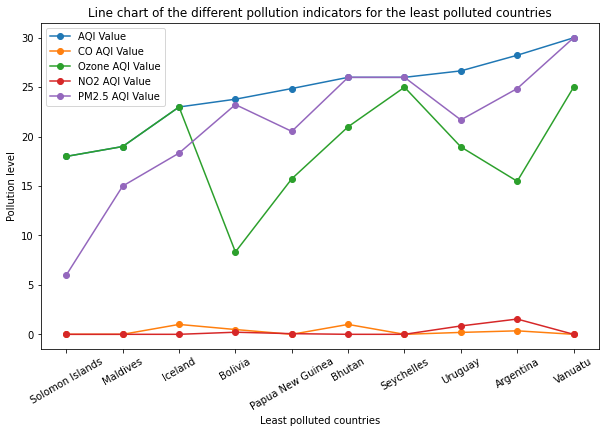

In [271]:
plt.figure(figsize=(10, 6))

plt.plot(best_countries["Country"], best_countries["AQI Value"], label="AQI Value", marker='o')
plt.plot(best_countries["Country"], best_countries["CO AQI Value"], label="CO AQI Value", marker='o')
plt.plot(best_countries["Country"], best_countries["Ozone AQI Value"], label="Ozone AQI Value", marker='o')
plt.plot(best_countries["Country"], best_countries["NO2 AQI Value"], label="NO2 AQI Value", marker='o')
plt.plot(best_countries["Country"], best_countries["PM2.5 AQI Value"], label="PM2.5 AQI Value", marker='o')

plt.xlabel("Least polluted countries")
plt.ylabel("Pollution level")
plt.title("Line chart of the different pollution indicators for the least polluted countries")
plt.xticks(rotation="30")
plt.legend()

plt.show()

Q5) We want to compare the level of pollution in the capital city and on average in the country, to see if there are specific policies we could recommend for the capital. <br>
We will focuss on two main subsets of our dataframe, the most polluted countries and the most populated countries and see how they compare.

In [272]:
#We use the same subsets as taken previously in part 2
most_populated = df.loc[df["World Population Percentage"] > 1.5]
most_polluted = df.loc[(df["AQI Category"]=="Unhealthy") | (df["AQI Category"]=="Hazardous")] 

For the most polluted countries we create a new data frame with the AQI Value for the capital and AQI Value for the country:

In [273]:
#We get all the countries (from the most polluted subset) that have their capital city in df2 (the data frame on the cities)
capital_pollution = df2.loc[(df2["Country"].isin(most_polluted["Country"])) & (df2["City"].isin(most_polluted["Capital"]))]
#We only keep the countries that have a capital value in our new data frame country_pollution
country_pollution = most_polluted.loc[most_polluted["Country"].isin(capital_pollution["Country"])]
#We sort by Country so that country_pollution and capital_pollution have the same order
capital_pollution = capital_pollution.sort_values(by="Country")
country_pollution = country_pollution.sort_values(by="Country")
#We only take the Country, City, AQI Value columns
capital_pollution = capital_pollution[["Country", "City", "AQI Value"]]
country_pollution = country_pollution[["Country", "AQI Value"]]
#We rename the column for clarity
capital_pollution = capital_pollution.rename({"AQI Value": "AQI Value Capital"}, axis=1)
country_pollution = country_pollution.rename({"AQI Value": "AQI Value Country"}, axis=1)

#We merge both dataframes on the Country column
merged_df = pd.merge(capital_pollution, country_pollution, on="Country", how="inner")
merged_df

,Country,City,AQI Value Capital,AQI Value Country
0,Aruba,Oranjestad,163,163.000000
1,Bahrain,Manama,188,188.000000
2,Eswatini,Mbabane,114,119.333333
3,India,New Delhi,174,152.964228
4,Mauritania,Nouakchott,166,179.000000
5,Oman,Muscat,155,137.500000
6,Pakistan,Islamabad,178,178.788274
7,Qatar,Doha,164,157.500000
8,Saudi Arabia,Riyadh,196,149.285714
9,Senegal,Dakar,166,152.424242


We can look at the results on area charts, to get a better idea of the comparaison

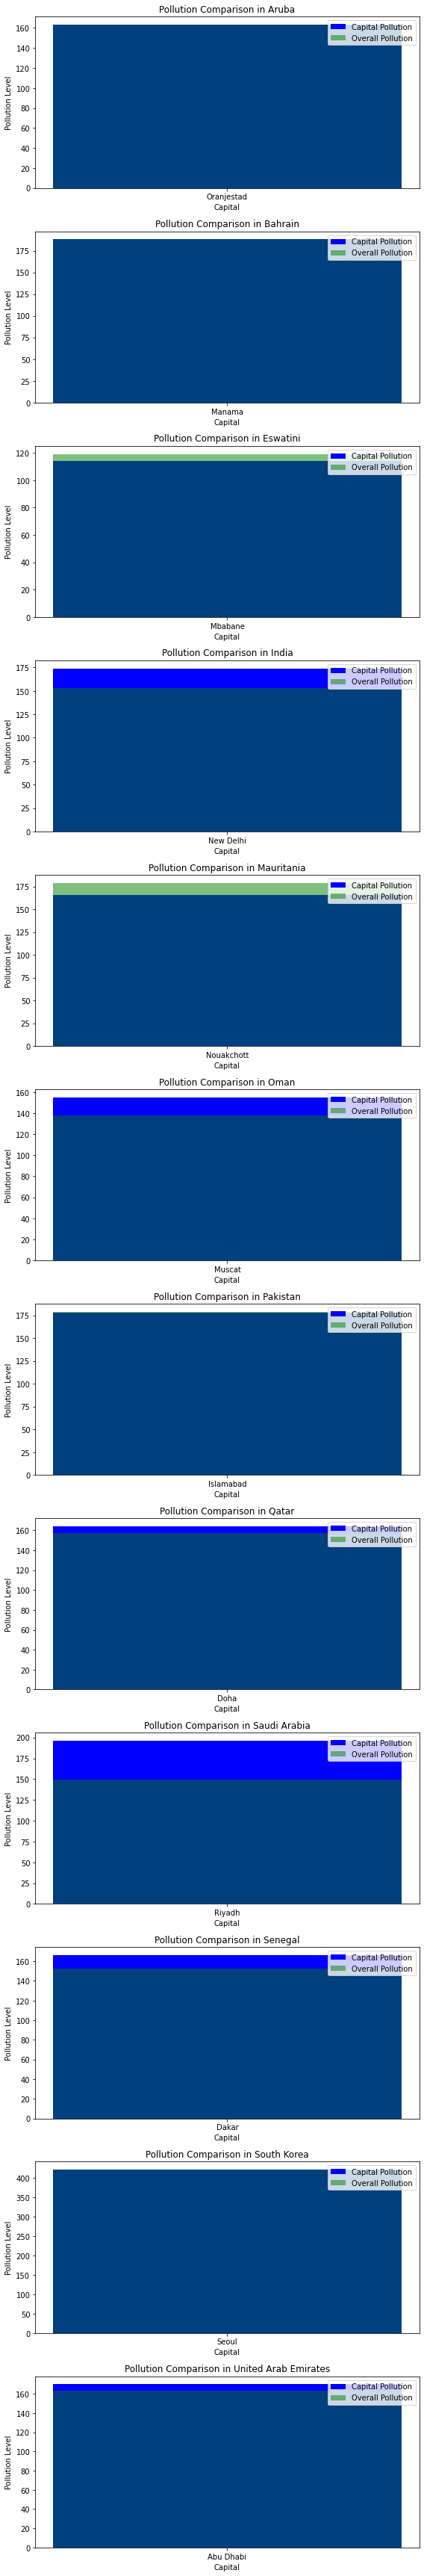

In [282]:
grouped_by_country = merged_df.groupby('Country')

fig, axes = plt.subplots(nrows=len(grouped_by_country), ncols=1, figsize=(8, 4 * len(grouped_by_country)))

for i, (country, group) in enumerate(grouped_by_country):
    axes[i].bar(group['City'], group['AQI Value Capital'], color='blue', label='Capital Pollution')
    axes[i].bar(group['City'], group['AQI Value Country'], color='green', alpha=0.5, label='Overall Pollution')#we add transparency to see the overlapping bars
    axes[i].set_title(f'Pollution Comparison in {country}')
    axes[i].set_xlabel('Capital')
    axes[i].set_ylabel('Pollution Level')
    axes[i].legend()

plt.tight_layout()
plt.show()

Overall we can see that in most cases the capital is more polluted that the overall country (or they are equal). So we could implment sepecific policies for the capital cities to reduce  pollution.

Lets see if these findings are the same for the most populated countries or how they might differ.

In [283]:
capital_pollution = df2.loc[(df2["Country"].isin(most_populated["Country"])) & (df2["City"].isin(most_populated["Capital"]))]
country_pollution = most_populated.loc[most_populated["Country"].isin(capital_pollution["Country"])]
capital_pollution = capital_pollution.sort_values(by="Country")
country_pollution = country_pollution.sort_values(by="Country")
capital_pollution = capital_pollution[["Country", "City", "AQI Value"]]
country_pollution = country_pollution[["Country", "AQI Value"]]
capital_pollution = capital_pollution.rename({"AQI Value": "AQI Value Capital"}, axis=1)
country_pollution = country_pollution.rename({"AQI Value": "AQI Value Country"}, axis=1)

merged_df = pd.merge(capital_pollution, country_pollution, on="Country", how="inner")
merged_df

,Country,City,AQI Value Capital,AQI Value Country
0,Brazil,Brasilia,21,44.574904
1,India,New Delhi,174,152.964228
2,India,Dhaka,235,152.964228
3,Indonesia,Jakarta,197,93.036939
4,Japan,Tokyo,79,51.723647
5,Nigeria,Abuja,73,99.611111
6,Pakistan,Islamabad,178,178.788274
7,United States,Moscow,30,59.740599


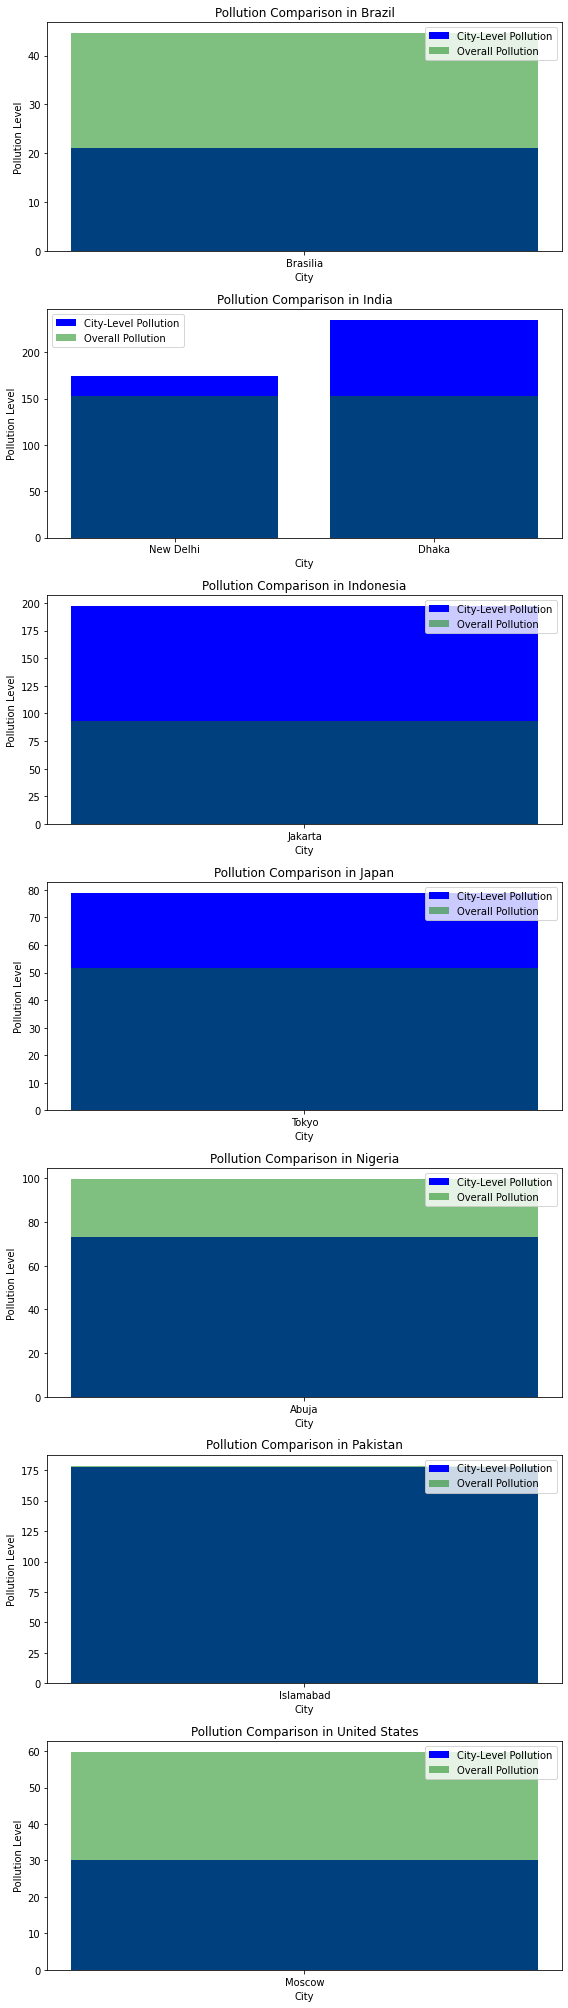

In [285]:
grouped_by_country = merged_df.groupby('Country')

fig, axes = plt.subplots(nrows=len(grouped_by_country), ncols=1, figsize=(8, 4 * len(grouped_by_country)))

for i, (country, group) in enumerate(grouped_by_country):
    axes[i].bar(group['City'], group['AQI Value Capital'], color='blue', label='City-Level Pollution')
    axes[i].bar(group['City'], group['AQI Value Country'], color='green', alpha=0.5, label='Overall Pollution')
    axes[i].set_title(f'Pollution Comparison in {country}')
    axes[i].set_xlabel('City')
    axes[i].set_ylabel('Pollution Level')
    axes[i].legend()

plt.tight_layout()
plt.show()

For the most populated countries, the capital city is not always more polluted than the rest of the country. That being said, it is still interessting to recommend policies specificly for the capital.

## Conclusion :
Part 3 has showed us which countries and which regions to concentrate on when it comes to proposing policies to reduce pollution levels. It can also be helpfull to implement extra policies specificly for the capital or the largest cities to reducepollution even more.